### The "Why" of Sampling: Population vs. Sample

In data analysis, we are often interested in understanding the characteristics of a large group, known as the **population**. The population is the complete set of all possible observations for a given context. This could be all the people in a country, every coffee bean grown in a year, or all website visits for a specific product.

Collecting data for an entire population, a process known as a **census**, is often prohibitively expensive, time-consuming, or simply impossible. **Sampling** provides a practical solution by allowing us to work with a **sample**, which is a manageable subset of the population. We can then use statistics to draw conclusions about the entire population based on what we observe in the sample.

#### Population Parameters vs. Point Estimates

The goal of sampling is typically to estimate a numerical summary of the population. The terminology to distinguish between a calculation on a population and on a sample is crucial:

  * **Population Parameter**: A numerical value calculated on the **entire population**. This is the true, but often unknown, value we want to find (e.g., the true average rating of all coffees).
  * **Point Estimate** (or **Sample Statistic**): The corresponding numerical value calculated on a **sample**. We use this point estimate as our best guess for the unknown population parameter (e.g., the average rating of 50 sampled coffees).


```python
import pandas as pd
import numpy as np

# Create a generic "population" DataFrame
population = pd.DataFrame({'value': np.random.normal(loc=100, scale=10, size=1000)})

# Take a random sample of 50 observations
sample = population.sample(n=50, random_state=42)

# 1. Calculate the population parameter (we can do this because we created the data)
population_mean = population['value'].mean()
print(f"Population Mean (Parameter): {population_mean:.4f}")

# 2. Calculate the point estimate from the sample
sample_mean = sample['value'].mean()
print(f"Sample Mean (Point Estimate): {sample_mean:.4f}")
```
### The Peril of Bad Sampling: Bias

For a point estimate to be a reliable guess of the population parameter, the sample must be **representative** of the population. If the sample is skewed in some way, it is considered **biased**, and the resulting point estimates will be inaccurate.

A common cause of this is **convenience sampling**, where data is collected using the easiest method available rather than a random one. The infamous 1936 *Literary Digest* poll is a classic example. Their sample was biased towards wealthier individuals, causing them to incorrectly predict the outcome of the presidential election. Similarly, taking the first 10 rows of a sorted dataset (`df.head(10)`) is a convenience sample and will likely produce a biased result.

### The Solution: Random Sampling and Reproducibility

#### Simple Random Sampling

To avoid bias, we use **random sampling**, where each member of the population has an equal chance of being selected. In pandas, this is easily achieved with the `.sample()` method. A random sample is much more likely to have a distribution that reflects the overall population.

#### Pseudo-Random Numbers and Reproducibility

Computers do not generate truly random numbers from physical processes. Instead, they use algorithms to generate **pseudo-random numbers**. These algorithms start with an initial value called a **seed** and then calculate the next "random" number based on the previous one.

The most important property of this process is that the **same seed value will always produce the exact same sequence of random numbers**. This is not a flaw; it is a critical feature that ensures **reproducibility**. By setting a seed before you sample, you guarantee that you (or a colleague) can re-run your code and get the exact same sample, making your analysis verifiable and reproducible. In `numpy` and `pandas`, the seed is set using `np.random.seed()` or the `random_state` parameter.

```python
# Set a seed and draw a sample
np.random.seed(42)
sample1 = population['value'].sample(n=5)
print(f"Sample 1 (seed=42):\n{sample1}\n")

# Draw another sample without resetting the seed - it will be different
sample2 = population['value'].sample(n=5)
print(f"Sample 2 (no seed reset):\n{sample2}\n")

# RESET the seed to the same value and draw a third sample
np.random.seed(42)
sample3 = population['value'].sample(n=5)
print(f"Sample 3 (seed reset to 42):\n{sample3}\n")
```

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
coffee_url = "https://assets.datacamp.com/production/repositories/5975/datasets/17ec88d6bf920ba7f159298d6acba118a907dacf/coffee_ratings_full.feather"
coffee_ratings = pd.read_feather(coffee_url)
coffee_ratings.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [4]:
# Points vs flavour: population
pts_vs_flavor_pop = coffee_ratings[["total_cup_points", "flavor"]]
display(pts_vs_flavor_pop)

,total_cup_points,flavor
0,90.58,8.83
1,89.92,8.67
2,89.75,8.50
3,89.00,8.58
4,88.83,8.50
...,...,...
1333,78.75,7.58
1334,78.08,7.67
1335,77.17,7.33
1336,75.08,6.83


In [5]:
# Points vs flavour: 10 row sample
pts_vs_flavor_samp = pts_vs_flavor_pop.sample(n=10)
display(pts_vs_flavor_samp)

,total_cup_points,flavor
747,82.25,7.58
293,83.83,7.83
428,83.25,7.50
1083,80.42,7.25
95,85.08,7.92
689,82.42,7.58
1267,76.17,7.33
1200,79.00,7.17
1137,79.92,7.33
250,84.00,7.75


In [6]:
# Python sampling for Series
cup_points_samp = coffee_ratings["total_cup_points"].sample(n=10)
display(cup_points_samp)

47      86.00
32      86.42
724     82.33
131     84.67
1147    79.75
370     83.50
277     83.83
772     82.17
532     83.00
40      86.17
Name: total_cup_points, dtype: float64

In [7]:
# Population parameters & point estimates - a population parameter is a calculation made on the population dataset
print(
    f"Mean of population (population parameter): {np.mean(pts_vs_flavor_pop['flavor']):.4f}"
)
# A point estimate or sample statistic is a calculation made on the sample dataset
print(f"Mean of sample (point estimate): {np.mean(pts_vs_flavor_samp['flavor']):.4f}")

Mean of population (population parameter): 7.5260
Mean of sample (point estimate): 7.5240


In [8]:
pts_vs_flavor_pop["flavor"].mean()

np.float64(7.526046337817639)

In [9]:
spotify_url = "https://assets.datacamp.com/production/repositories/5975/datasets/18d07c39535b900b64dc145985d9e8dfbf2ca498/spotify_2000_2020.feather"
spotify_population = pd.read_feather(spotify_url)
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [10]:
# Sample 1000 rows from spotify_population, assigning to spotify_sample.
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
display(spotify_sample)

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
8629,0.498000,['Randy Travis'],0.534,201240.0,3.354000,0.547,0.0,0riGx0wA6jMQsFmgdOUgcH,0.000000,1.0,0.0897,-7.915,1.0,Three Wooden Crosses,38.0,2002-10-15,0.0323,158.006,0.423,2002.0
24471,0.380000,['Drake'],0.747,181933.0,3.032217,0.571,1.0,79XrkTOfV1AqySNjVlygpW,0.000000,11.0,0.5340,-7.916,1.0,Energy,71.0,2015-02-12,0.4780,172.104,0.553,2015.0
25739,0.010600,"['Fat Joe', 'Lil Wayne']",0.744,247413.0,4.123550,0.697,1.0,4JPCdSaqs9dJd7RatFSHww,0.000000,11.0,0.0842,-5.063,0.0,Make It Rain,59.0,2006-11-14,0.1970,149.280,0.767,2006.0
8496,0.000201,['Boysetsfire'],0.458,253440.0,4.224000,0.878,0.0,3f0VeXFWFrDjt9BFmRPIej,0.081900,10.0,0.2230,-6.035,0.0,Rookie,49.0,2000-01-01,0.0601,98.144,0.348,2000.0
2827,0.345000,['Maelo Ruiz'],0.748,310973.0,5.182883,0.512,0.0,2YzhQEikYymq0HR9oc0EGT,0.000254,5.0,0.2690,-9.809,1.0,Si Supieras,59.0,2007-11-20,0.0371,91.490,0.868,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20544,0.992000,['Elijah Who'],0.798,148034.0,2.467233,0.117,0.0,0A6dTlWYD2magT5bqUyZLM,0.821000,0.0,0.1140,-16.003,1.0,i'm tired of feeling this way,58.0,2017-10-13,0.0723,137.830,0.192,2017.0
17515,0.377000,"['Al Green', 'Corinne Bailey Rae']",0.450,277014.0,4.616900,0.356,0.0,1pwy1QgUguLCykSAmLPMIQ,0.000021,0.0,0.1160,-9.892,1.0,Take Your Time,46.0,2008-01-01,0.0301,125.367,0.244,2008.0
32372,0.381000,['Beyoncé'],0.303,273880.0,4.564667,0.384,0.0,1pzJboOZaDNwshBnOlNh3a,0.000005,6.0,0.0661,-7.342,1.0,1+1,58.0,2011-06-24,0.0339,63.345,0.261,2011.0
26098,0.317000,['Alan Jackson'],0.709,242067.0,4.034450,0.610,0.0,3xzoXqypESowMIDPX760Ds,0.000000,11.0,0.1020,-7.206,1.0,Drive (For Daddy Gene),60.0,2010-11-19,0.0434,125.189,0.475,2010.0


In [11]:
# Calculate the mean duration_minutes and from spotify_population using pandas.
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration_minutes and from spotify_sample using pandas.
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(f"Mean of population: {mean_dur_pop:.4f}")

print(f"Mean of population sample: {mean_dur_samp:.4f}")

Mean of population: 3.8522
Mean of population sample: 3.8578


### Simple sampling and calculating with NumPy
You can also use `numpy` to calculate parameters or statistics from a list or `pandas` Series.

You'll be turning it up to eleven and looking at the loudness property of each song.

In [12]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population["loudness"]

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = loudness_pop.mean()

# Calculate the mean of loudness_samp
mean_loudness_samp = loudness_samp.mean()

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.626329999999999


## What is Convenience Sampling?

Convenience sampling is the practice of collecting data using the easiest method available. This might involve surveying people in a specific location (like a shopping mall), using the first `n` rows of a dataset, or polling individuals who are easily reachable. While this method is straightforward, it carries a significant risk: the individuals or data points that are "convenient" to access are often systematically different from the population as a whole. This discrepancy leads to sample bias.

### Historical Failures: The Dangers of Sample Bias

History is filled with examples where convenience sampling led to dramatically incorrect conclusions.

#### The 1936 Literary Digest Poll

One of the most famous examples is the 1936 *Literary Digest* presidential poll. The magazine surveyed millions of people and confidently predicted that Alf Landon would defeat Franklin D. Roosevelt, winning 57% of the vote. However, the actual result was a landslide victory for Roosevelt, who won 62% of the vote. The poll's failure was due to **sample bias**. Their sample was drawn from sources like telephone directories and club membership lists, which in 1936, over-represented wealthier Americans who were more likely to vote for Landon. The sample was not representative of the general electorate, and the poll's prediction was consequently worthless.

### The Disneyland Paris Analogy

A more modern example illustrates the same principle. If you were to estimate the average age of all people in France, you could conduct a survey at Disneyland Paris. You might find a mean age of 24.6 years in your sample. However, this would be a **poor estimate** of the true average age in France (which was 41.2 in 2015), because visitors to a theme park are not representative of the country's entire population.

### Convenience Sampling in Code

In data analysis, taking the first `n` rows of a DataFrame with `.head(n)` is a form of convenience sampling. If the data is sorted in any way, this sample will be biased.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a generic "population" DataFrame, sorted by value.
# This mimics a dataset like coffee ratings where the best are listed first.
population = pd.DataFrame({
    'rating': np.sort(np.random.normal(loc=82, scale=3, size=1000))[::-1]
})

# Population Parameter 
population_mean = population['rating'].mean()
print(f"True Population Mean Rating: {population_mean:.2f}")

# Convenience Sample 
convenience_sample = population.head(10)
convenience_mean = convenience_sample['rating'].mean()
print(f"Convenience Sample Mean (first 10 rows): {convenience_mean:.2f}")
```

As shown, the mean of the convenience sample is a significant overestimate of the true population mean because the sample only includes the highest-rated items.

### Visualizing the Bias

A histogram clearly shows how unrepresentative a convenience sample can be.

```python
import seaborn as sns

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Population distribution
sns.histplot(data=population, x='rating', bins=np.arange(70, 95, 1), ax=axes[0])
axes[0].set_title("Population Distribution")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Count")

# Convenience sample distribution
sns.histplot(data=convenience_sample, x='rating', bins=np.arange(70, 95, 1), ax=axes[1])
axes[1].set_title("Convenience Sample Distribution")
axes[1].set_xlabel("Rating")

plt.tight_layout()
plt.show()
```

The convenience sample's distribution is a skewed, narrow slice of the population's distribution and does not reflect its true shape or center.

### The Alternative: Simple Random Sampling

To avoid sample bias, **simple random sampling** is used. This method ensures that every member of the population has an equal chance of being selected. A random sample is far more likely to be representative.

```python
# Random Sample 
np.random.seed(42) # for reproducibility
random_sample = population.sample(n=10)
random_mean = random_sample['rating'].mean()
print(f"Random Sample Mean: {random_mean:.2f}")

# Visualize the random sample distribution 
# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Population distribution
sns.histplot(data=population, x='rating', bins=np.arange(70, 95, 1), ax=axes[0])
axes[0].set_title("Population Distribution")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Count")

# Random sample distribution
sns.histplot(data=random_sample, x='rating', bins=np.arange(70, 95, 1), ax=axes[1])
axes[1].set_title("Random Sample Distribution")
axes[1].set_xlabel("Rating")

plt.tight_layout()
plt.show()
```

In [13]:
# Convenience sampling coffee ratings
coffee_ratings["total_cup_points"].mean()

np.float64(82.15120328849028)

In [14]:
# One form of convenience sampling would be to take the first ten rows, rather than the random rows we took in previous code cells
coffee_ratings_first10 = coffee_ratings.head(10)
print(coffee_ratings_first10["total_cup_points"].mean())

89.1


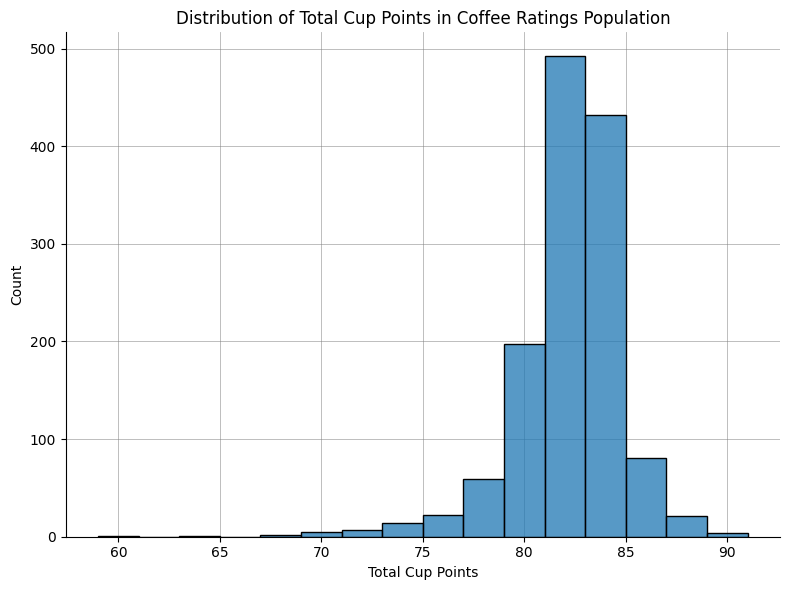

In [15]:
# Histogram of the original population
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(coffee_ratings["total_cup_points"], bins=np.arange(59, 93, 2), ax=ax)
sns.despine()

ax.set(
    xlabel="Total Cup Points",
    ylabel="Count",
    title="Distribution of Total Cup Points in Coffee Ratings Population",
)
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

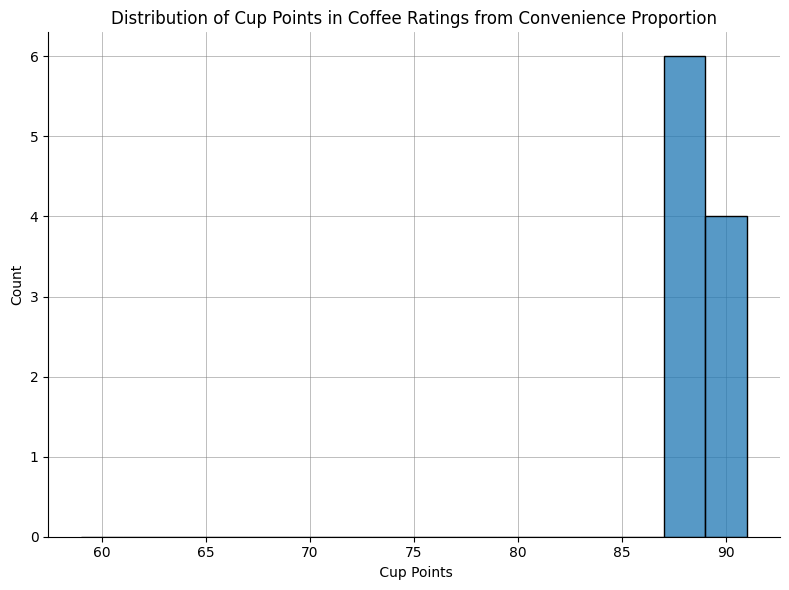

In [16]:
# Histogram of the convenience sample proportion
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(
    coffee_ratings_first10["total_cup_points"], bins=np.arange(59, 93, 2), ax=ax
)
sns.despine()

ax.set(
    xlabel=" Cup Points",
    ylabel="Count",
    title="Distribution of Cup Points in Coffee Ratings from Convenience Proportion",
)
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

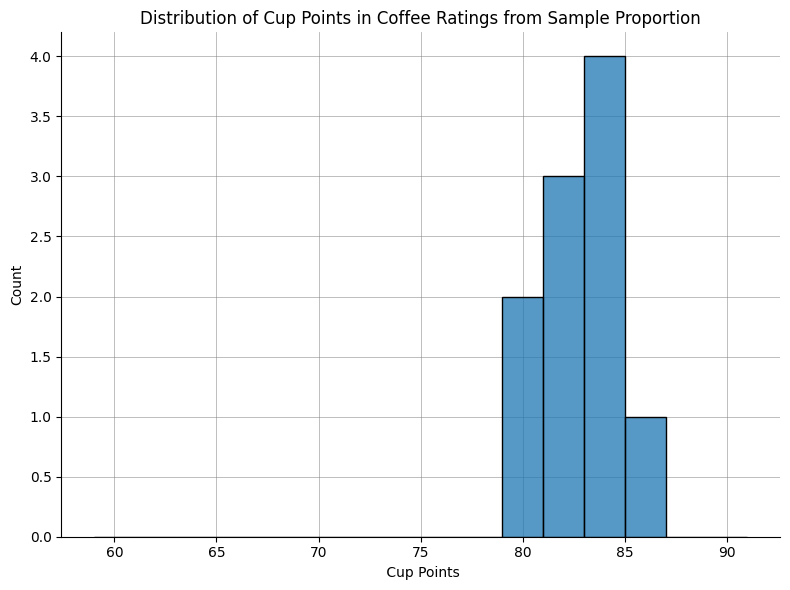

In [17]:
# Visuaiizing selection bias for a random sample
coffee_sample = coffee_ratings.sample(n=10)

# Histogram of the truly random sample proportion
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(coffee_sample["total_cup_points"], bins=np.arange(59, 93, 2), ax=ax)
sns.despine()

ax.set(
    xlabel=" Cup Points",
    ylabel="Count",
    title="Distribution of Cup Points in Coffee Ratings from Sample Proportion",
)
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [18]:
spotify_population["acousticness"]

0        0.97200
1        0.32100
2        0.00659
3        0.00390
4        0.12200
          ...   
41651    0.17300
41652    0.01670
41653    0.53800
41654    0.07140
41655    0.10900
Name: acousticness, Length: 41656, dtype: float64

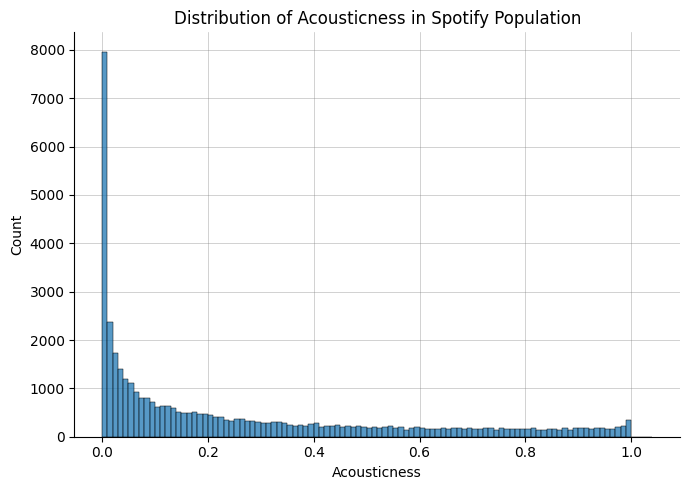

In [19]:
# Plot a histogram of the acousticness from spotify_population with wider bins using pandas .hist().
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    x="acousticness",
    data=spotify_population,
    bins=np.arange(0, 1.05, 0.01),
)
sns.despine()

ax.set(
    xlabel="Acousticness",
    ylabel="Count",
    title="Distribution of Acousticness in Spotify Population",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

### Are findings from the sample generalizable?
You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an `acousticness` column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those songs.

In [20]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/sampling/data/spotify_mysterious_sample.csv"
spotify_mysterious_sample = pd.read_csv(
    url, usecols=lambda col: not col.startswith("Unnamed")
)

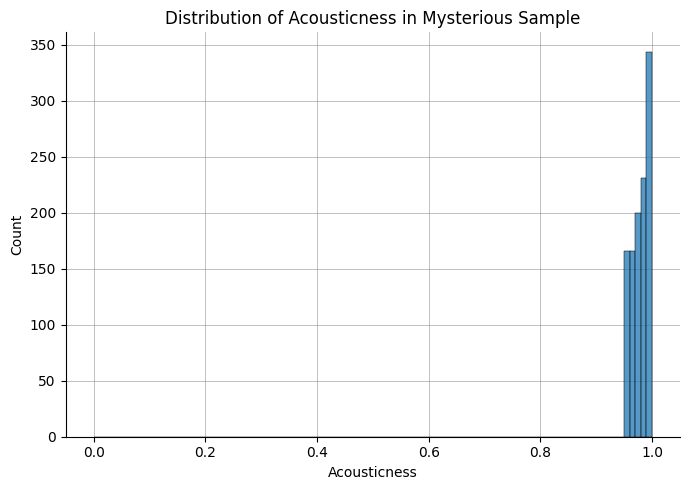

In [21]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    x="acousticness", data=spotify_mysterious_sample, bins=np.arange(0, 1.01, 0.01)
)
sns.despine()
ax.set(
    xlabel="Acousticness",
    ylabel="Count",
    title="Distribution of Acousticness in Mysterious Sample",
)

ax.grid(True, alpha=0.5, color="grey", linewidth=0.7)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

### Are these findings generalizable?
Let's look at another sample to see if it is representative of the population. This time, you'll look at the `duration_minutes` column of the Spotify dataset, which contains the length of the song in minutes.

In [22]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/sampling/data/spotify_mysterious_sample2.csv"
spotify_mysterious_sample2 = pd.read_csv(
    url, usecols=lambda col: not col.startswith("Unnamed")
)

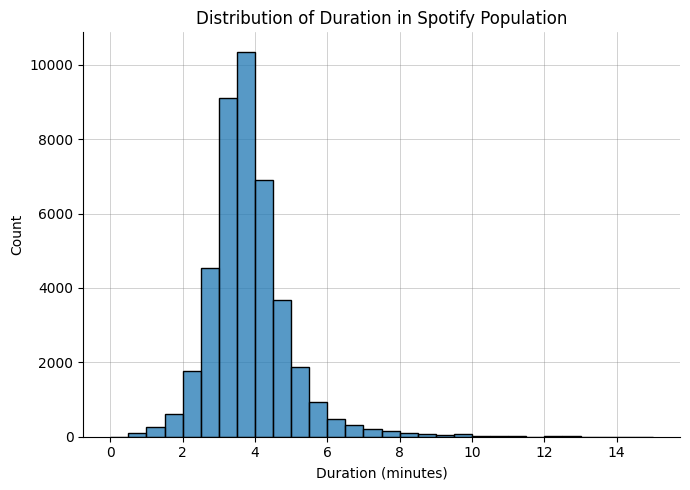

In [23]:
# Plot a histogram of duration_minutes from spotify_population with bins of width 0.5 from 0 to 15
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    x="duration_minutes", data=spotify_population, bins=np.arange(0, 15.5, 0.5)
)
sns.despine()

ax.set(
    xlabel="Duration (minutes)",
    ylabel="Count",
    title="Distribution of Duration in Spotify Population",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

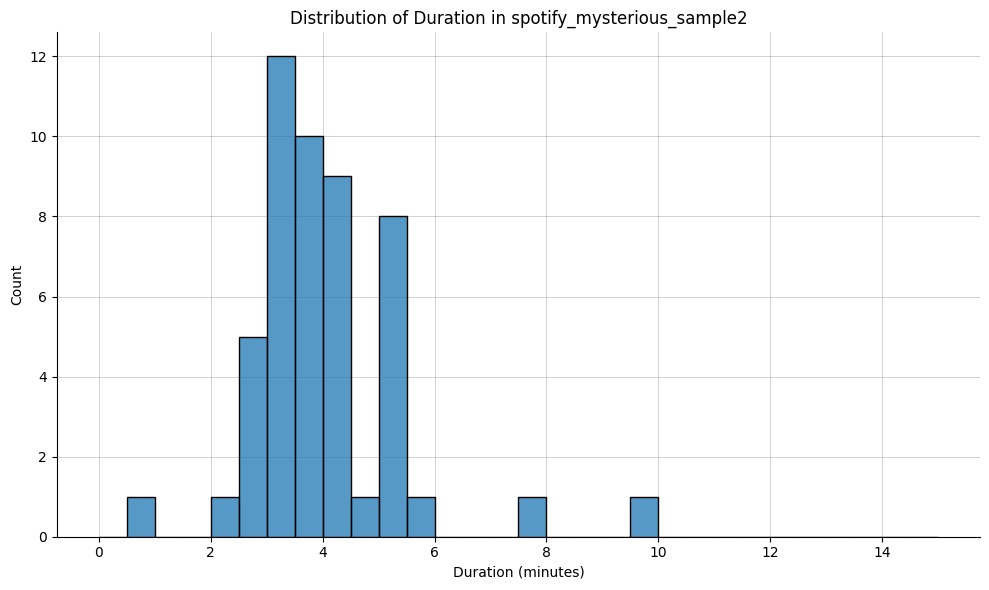

In [24]:
# Update the histogram code to use the spotify_mysterious_sample2 dataset.
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    x="duration_minutes", data=spotify_mysterious_sample2, bins=np.arange(0, 15.5, 0.5)
)
sns.despine()

ax.set(
    xlabel="Duration (minutes)",
    ylabel="Count",
    title="Distribution of Duration in spotify_mysterious_sample2",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## True Randomness vs. Pseudo-Randomness

In the strictest sense, a random event is one that happens without any method or conscious decision. **True random numbers** are generated from unpredictable physical phenomena, such as atmospheric noise or radioactive decay. While these numbers are genuinely random, the processes to generate them are often slow and computationally expensive, making them impractical for most data science and simulation tasks.

Computers, being deterministic machines, use an alternative called **pseudo-random number generation**. This is a fast and cheap algorithmic process:

1.  It starts with an initial number called the **seed**.
2.  An algorithm takes the current number and performs a mathematical operation to calculate the next "random" number in the sequence.
3.  This new number then becomes the input for the next calculation, and so on.

Because this process is entirely algorithmic, the sequence of numbers is not truly random. However, the algorithms are designed such that the resulting sequence passes many statistical tests for randomness and is practically indistinguishable from a true random sequence for most purposes.

### The Importance of the Seed for Reproducibility

The most critical property of pseudo-random number generation is that **the same seed value will always produce the exact same sequence of numbers**.

This is not a flaw; it is a fundamental and essential feature for scientific and analytical work. It ensures **reproducibility**. If your analysis involves a random process (like creating a random sample of data or initializing the weights in a neural network), you must be able to replicate your results perfectly. By setting a seed before you generate random numbers, you guarantee that you, or a colleague, can re-run the code and get the exact same "random" numbers, and therefore the exact same final result.

This is implemented in Python's `numpy` library using the `np.random.seed()` function.

```python
import numpy as np

# 1. Set a seed and generate two random numbers 
np.random.seed(42)
first_sequence = np.random.normal(loc=10, scale=2, size=2)
print(f"First sequence (seed=42): {first_sequence}")

# 2. Generate two more numbers without resetting the seed 
# The sequence continues from where it left off.
second_sequence = np.random.normal(loc=10, scale=2, size=2)
print(f"Second sequence (no reset): {second_sequence}")

# 3. RESET the seed to the original value 
np.random.seed(42)
third_sequence = np.random.normal(loc=10, scale=2, size=2)
print(f"Third sequence (seed reset to 42): {third_sequence}")

# 4. Use a different seed 
np.random.seed(101)
fourth_sequence = np.random.normal(loc=10, scale=2, size=2)
print(f"Fourth sequence (seed=101): {fourth_sequence}")
```

As shown, the first and third sequences are identical because the seed was reset to the same value (`42`). This demonstrates how to ensure your random processes are reproducible.

### Generating Random Numbers in NumPy

The `numpy.random` module is the standard tool in Python for generating arrays of pseudo-random numbers from a wide variety of statistical distributions.

Some of the most common functions include:

| Function | Distribution |
| :--- | :--- |
| `.uniform(low, high, size)` | Uniform (all values in range have equal probability) |
| `.normal(loc, scale, size)` | Normal (Gaussian) |
| `.randint(low, high, size)` | Uniform integers |
| `.binomial(n, p, size)` | Binomial |
| `.poisson(lam, size)` | Poisson |
| `.beta(a, b, size)` | Beta |

You can visualize the distribution of the numbers you generate using a histogram.

```python
import matplotlib.pyplot as plt

np.random.seed(123)

# Generate 5000 random numbers from a Beta distribution
randoms_from_beta = np.random.beta(a=2, b=5, size=5000)

# Plot a histogram to visualize their distribution
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=pd.DataFrame({'beta_values': randoms_from_beta}), 
             x='beta_values', 
             bins=np.arange(0, 1.01, 0.05), 
             edgecolor='black', 
             ax=ax)
ax.set_title("Histogram of 5000 Pseudo-Random Numbers from a Beta Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.grid(True, linestyle='--')
plt.show()
```

This process of setting a seed, generating numbers from a chosen distribution, and analyzing their properties is a foundational skill in simulation, statistics, and machine learning.

In [25]:
randoms = np.random.beta(2, 2, 5000)
print(randoms)

[0.64488931 0.36550823 0.73483467 ... 0.50526934 0.48176829 0.45101698]


In [26]:
# Generate 5000 numbers from a uniform distribution, setting the parameters low to -3 and high to 3.
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Generate 5000 numbers from a normal distribution, setting the parameters loc to 5 and scale to 2.
normals = np.random.normal(loc=5, scale=2, size=5000)

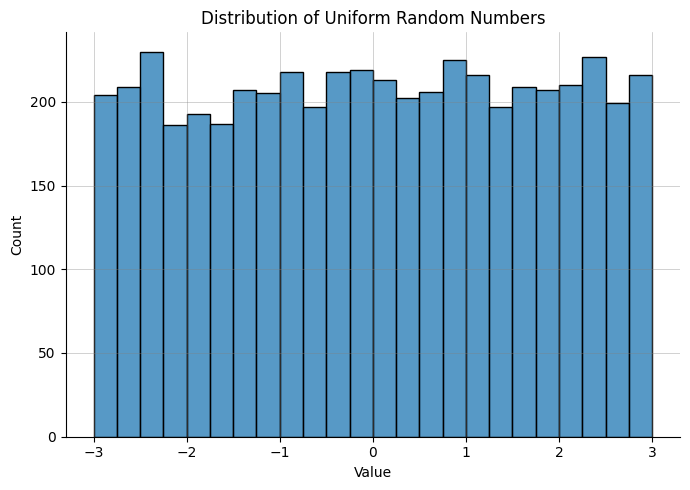

In [27]:
# Plot a histogram of uniforms with bins of width of 0.25 from -3 to 3
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    uniforms,
    bins=np.arange(-3, 3.25, 0.25),
)
sns.despine()

ax.set(
    xlabel="Value",
    ylabel="Count",
    title="Distribution of Uniform Random Numbers",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")

plt.tight_layout()
plt.show()

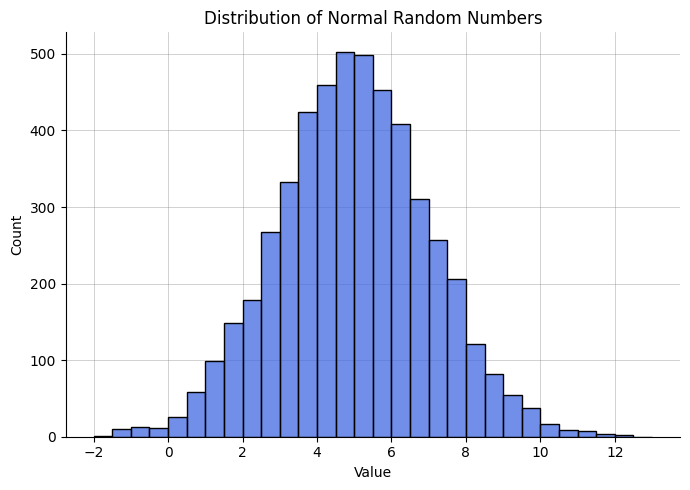

In [28]:
# Plot a histogram of normals with bins of width of 0.5 from -2 to 13
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(normals, bins=np.arange(-2, 13.5, 0.5), color="royalblue")
sns.despine()

ax.set(
    xlabel="Value",
    ylabel="Count",
    title="Distribution of Normal Random Numbers",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## Simple Random Sampling

**Simple random sampling** is a probability sampling method where each individual observation in the population has an equal chance of being selected. Furthermore, every possible sample of a given size `n` has an equal chance of being chosen. This method is the gold standard for avoiding selection bias, as it relies on pure chance.

In pandas, simple random sampling is performed efficiently using the `.sample()` method.

  * **`n`**: The number of samples to return.
  * **`frac`**: The proportion of samples to return (e.g., `0.1` for 10%).
  * **`random_state`**: A seed for the pseudo-random number generator to ensure reproducibility.

```python
import pandas as pd
import numpy as np

# Create a generic "population" DataFrame
population = pd.DataFrame({'value': np.arange(0, 100)})

# Take a simple random sample of 5 rows
random_sample = population.sample(n=5, random_state=42)

print(random_sample)
```

### Systematic Sampling

**Systematic sampling** is another probability sampling method that involves selecting observations from an ordered list at a regular interval.

**The Process:**

1.  Calculate a sampling interval, `k`, by dividing the population size by the desired sample size.
2.  Select every `k`-th element from the population.

This can be implemented in pandas using integer-location based indexing (`.iloc`) with a slice.

```python
# Define sample size and population size
sample_size = 5
population_size = len(population)

# 1. Calculate the interval
interval = population_size // sample_size

# 2. Select every k-th row
systematic_sample = population.iloc[::interval]

print(systematic_sample)
```
### The Hidden Danger of Systematic Sampling

Systematic sampling is only valid if the order of the data in the DataFrame is **random** with respect to the variable(s) of interest. If the data is sorted or contains a cyclical pattern, systematic sampling can produce a highly biased and unrepresentative sample.

For example, if a dataset of customer ratings is sorted from highest to lowest, a systematic sample will consist of a few high ratings, a few medium ratings, and a few low ratings, but it will not be a truly random mix.

#### Visual Diagnosis

You can check for patterns in your data's order by plotting a variable against the DataFrame's index. A clear trend in this plot signals that systematic sampling would be dangerous.

```python
import seaborn as sns

# Create a "dangerous" population that is sorted by value
sorted_population = pd.DataFrame({'value': np.sort(np.random.normal(100, 20, 1000))})
# Add an index column for plotting
sorted_population_with_id = sorted_population.reset_index()

# Plot value vs. index using seaborn OOP
fig, ax = plt.subplots(figsize=(7, 4))
sns.scatterplot(
    data=sorted_population_with_id,
    x="index",
    y="value",
    ax=ax,
    color="tab:red",
    edgecolor="w",
    s=40
)
ax.set_title("Data is NOT Randomly Ordered")
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.grid(True, linestyle="--", alpha=0.6)
sns.despine(ax=ax)
plt.tight_layout()
plt.show()

# Perform systematic sampling on this sorted data
biased_systematic_sample = sorted_population.iloc[::200] # interval = 1000 // 5
print(biased_systematic_sample)
print(f"\nBiased Sample Mean: {biased_systematic_sample['value'].mean():.2f}")
print(f"True Population Mean: {sorted_population['value'].mean():.2f}")
```

### The Solution: Shuffling

To safely use systematic sampling (or to ensure randomness in general), you must first break any existing order in the data by **shuffling** it. A simple and effective way to shuffle a DataFrame is to take a random sample of 100% of its rows (`frac=1`).

A key statistical insight is that **a systematic sample drawn from a randomly shuffled population is equivalent to a simple random sample.**

```python
# Shuffle the dangerous, sorted population
shuffled_population = sorted_population.sample(frac=1, random_state=42).reset_index(drop=True)

# The plot now shows no trend
fig, ax = plt.subplots(figsize=(7, 4))
sns.scatterplot(
    data=shuffled_population.reset_index(),
    x="index",
    y="value",
    ax=ax,
    color="tab:blue",
    edgecolor="w",
    s=40
)
ax.set_title("Data is NOW Randomly Ordered")
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.grid(True, linestyle="--", alpha=0.6)
sns.despine(ax=ax)
plt.tight_layout()
plt.show()

# Perform systematic sampling on the SHUFFLED data
safe_systematic_sample = shuffled_population.iloc[::200]
print(safe_systematic_sample)
print(f"\nSafe Sample Mean: {safe_systematic_sample['value'].mean():.2f}")
print(f"True Population Mean: {sorted_population['value'].mean():.2f}")
```

After shuffling, the systematic sampling procedure produces a much more representative sample whose mean is a better estimate of the true population mean.

In [29]:
coffee_ratings.sample(n=5, random_state=19000113)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
437,83.25,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora bonanza - armenia quindioa,3-68-0205,None,1600-1800msnm,...,None,0.0,"June 13th, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1800.0,1700.0
285,83.83,Arabica,ipanema coffees,Brazil,fazenda rio verde,None,ipanema coffees,002/4177/0121,ipanema coffees,1260,...,Green,0.0,"December 26th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1260.0,1260.0,1260.0
784,82.08,Arabica,cafe politico,Colombia,None,None,None,3-59-1656,cafe politico,None,...,Green,0.0,"September 12th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN
648,82.58,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora boananza,3-68-0140,exportadora de cafe condor s.a,1750 msnm,...,Green,0.0,"February 27th, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1750.0,1750.0,1750.0
155,84.58,Arabica,exportadora de cafe condor s.a,Colombia,various,None,trilladora boananza,3-68-0005,exportadora de cafe condor s.a,1800 msnm,...,Green,6.0,"October 9th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1800.0,1800.0,1800.0


In [30]:
# Systematic sampling: select every k-th row from the population to form a sample
# Calculate the interval (step size) to pick 5 evenly spaced rows from the DataFrame
systematic_sample = coffee_ratings.take(
    np.arange(0, len(coffee_ratings), len(coffee_ratings) // 5)[:5]
)

display(systematic_sample)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
267,83.92,Arabica,federacion nacional de cafeteros,Colombia,None,None,None,01-1969,federacion nacional de cafeteros,None,...,None,1.0,"March 11th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
534,82.92,Arabica,consejo salvadoreño del café,El Salvador,santa josefita,1-198,beneficio cuzcachapa,09-030-273,soc. coop. cuzcachapa de r.l.,1350,...,Green,1.0,"August 28th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
801,82.00,Arabica,"lin, che-hao krude 林哲豪",Taiwan,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",None,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",Taiwan,"red on tree co., ltd.",600m,...,Green,0.0,"July 22nd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,600.0,600.0,600.0
1068,80.50,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,王秋金,1,non,None,王秋金,50,...,Blue-Green,0.0,"December 8th, 2018",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,50.0,50.0,50.0


### The Dangers of Systematic Sampling
Systematic sampling involves selecting every k-th observation from a dataset, where k = population_size / sample_size. While this method is efficient and ensures even coverage across the dataset, it has a critical vulnerability:
   if the data is sorted or has any underlying pattern related to row order, systematic sampling can produce severely biased results.

### The Problem with Sorted Data:
Many real-world datasets are naturally sorted by some criterion. For example:
- Coffee ratings might be sorted by quality (highest rated first)
- Customer data might be sorted by registration date
- Financial data might be sorted by transaction amount

When systematic sampling is applied to sorted data, the sample will reflect this sorting pattern rather than providing a representative cross-section of the population. This violates the fundamental assumption that each observation has an equal probability of being selected.

### Code Implementation Notes:
- reset_index() creates a new integer index starting from 0
- This index represents the original row position in the dataset
- The original index becomes a regular column, preserving position information
- This setup enables us to create scatter plots showing variable vs. position

What to Look For in the Following Plot:
If you see a clear trend, pattern, or slope in the scatter plot of  "aftertaste vs. index", it indicates that the coffee_ratings dataset is NOT randomly ordered. This would make systematic sampling dangerous because it would systematically over-sample or under-sample certain quality levels, leading to biased estimates of population parameters.

In [31]:
# Add an index column to coffee_ratings to track row positions
# This is essential for systematic sampling analysis as it allows us to visualize
# the relationship between row position and the variable of interest
coffee_ratings_with_id = coffee_ratings.reset_index()

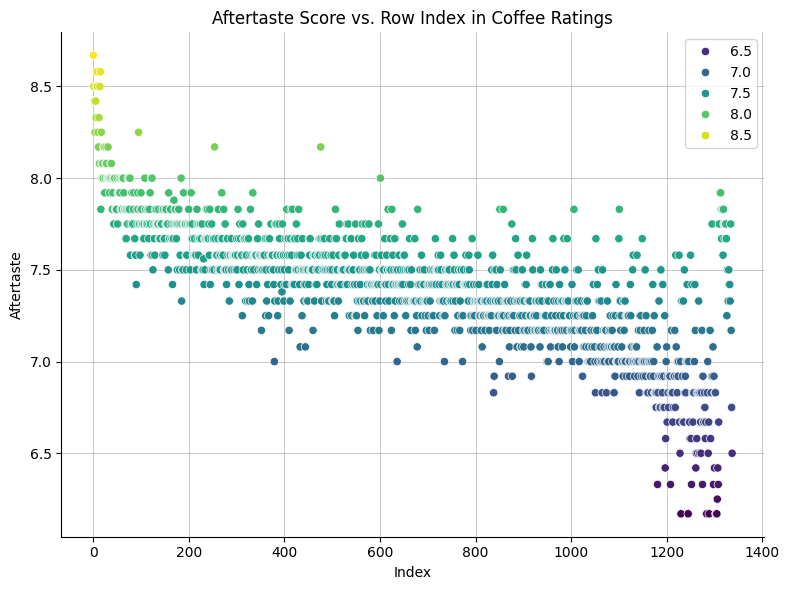

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    x="index",
    y="aftertaste",
    data=coffee_ratings_with_id,
    color="steelblue",
    ax=ax,
    hue="aftertaste",
    palette="viridis",
)
sns.despine()
ax.set(
    xlabel="Index",
    ylabel="Aftertaste",
    title="Aftertaste Score vs. Row Index in Coffee Ratings",
)

ax.grid(True, alpha=0.5, linewidth=0.6, color="grey")
ax.set_axisbelow(True)
ax.legend(loc="upper right")  # Move legend to upper right corner


plt.tight_layout()
plt.show()

### The Solution:
Before applying systematic sampling, the data should be randomly shuffled using `sample(frac=1, random_state=seed)` to break any existing patterns. Once shuffled, systematic sampling becomes equivalent to simple random sampling.

In [33]:
shuffled = coffee_ratings.sample(frac=1)
shuffled = shuffled.reset_index(drop=True).reset_index()

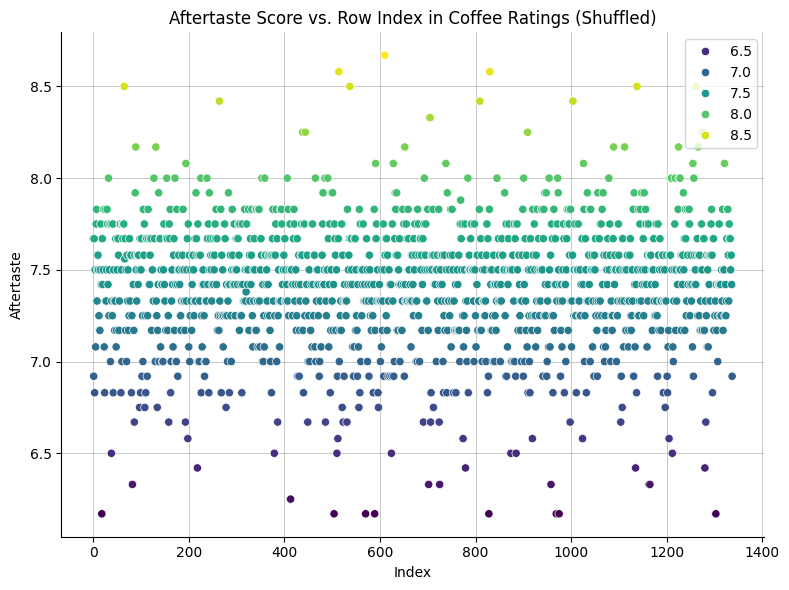

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    x="index",
    y="aftertaste",
    data=shuffled,
    color="steelblue",
    ax=ax,
    hue="aftertaste",
    palette="viridis",
)
sns.despine()
ax.set(
    xlabel="Index",
    ylabel="Aftertaste",
    title="Aftertaste Score vs. Row Index in Coffee Ratings (Shuffled)",
)

ax.grid(True, alpha=0.5, linewidth=0.6, color="grey")
ax.set_axisbelow(True)

ax.legend(loc="upper right")  # Move legend to upper right corner

plt.tight_layout()
plt.show()

In [35]:
url = "https://github.com/jhlopesalves/data-science-practice-notebook/raw/refs/heads/main/Python/statistics/sampling/data/attrition.feather"
attrition_pop = pd.read_feather(url)
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [36]:
# Sample 70 rows from attrition_pop using simple random sampling, setting the random seed to 18900217.
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
display(attrition_samp)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,0.0,Travel_Frequently,1410,Sales,3,Below_College,Medical,Very_High,Female,...,Outstanding,Medium,2,6,3,Better,6,5,0,4
1180,36,0.0,Travel_Rarely,530,Sales,2,Master,Life_Sciences,High,Female,...,Excellent,High,0,17,2,Good,13,7,6,7
230,26,0.0,Travel_Rarely,1443,Sales,23,Bachelor,Marketing,High,Female,...,Excellent,High,1,5,2,Good,2,2,0,0
211,29,0.0,Travel_Frequently,410,Research_Development,2,Below_College,Life_Sciences,Very_High,Female,...,Excellent,High,3,4,3,Better,3,2,0,2


### Systematic sampling
One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows `0`, `200`, `400`, `600`, and `800`.

In [37]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop[::interval]

# Print the sample
display(attrition_sys_samp)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,48,0.0,Travel_Rarely,715,Research_Development,1,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,High,0,25,3,Best,1,0,0,0
1386,48,0.0,Travel_Rarely,1355,Research_Development,4,Master,Life_Sciences,High,Male,...,Excellent,Medium,0,27,3,Better,15,11,4,8
1407,50,0.0,Travel_Rarely,989,Research_Development,7,College,Medical,Medium,Female,...,Excellent,Very_High,1,29,2,Good,27,3,13,8
1428,50,0.0,Non-Travel,881,Research_Development,2,Master,Life_Sciences,Low,Male,...,Excellent,Very_High,1,31,3,Better,31,6,14,7


### Is systematic sampling OK?
Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

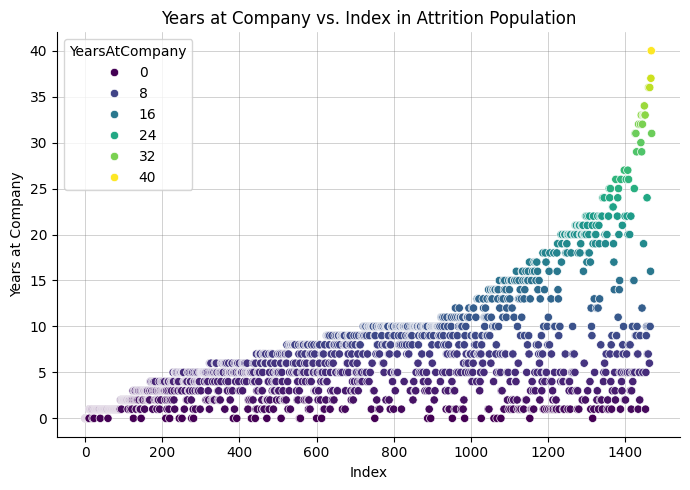

In [38]:
# Add an index column to attrition_pop, assigning the result to attrition_pop_id.
attrition_pop_id = attrition_pop.reset_index()

# Create a scatter plot of YearsAtCompany versus index for attrition_pop_id
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(
    x="index",
    y="YearsAtCompany",
    data=attrition_pop_id,
    ax=ax,
    palette="viridis",
    hue="YearsAtCompany",
)
sns.despine()

ax.set(
    xlabel="Index",
    ylabel="Years at Company",
    title="Years at Company vs. Index in Attrition Population",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

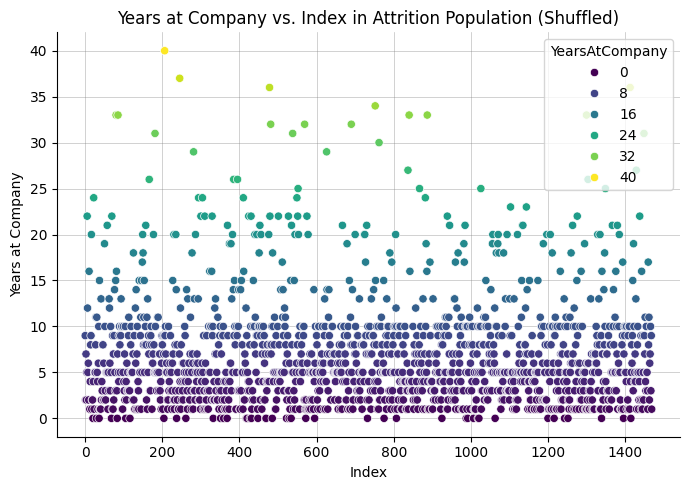

In [39]:
# Randomly shuffle the rows of attrition_pop.
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes, and add an index column to attrition_pop.
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Repeat the scatter plot of YearsAtCompany versus index, this time using attrition_shuffled.
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(
    x="index",
    y="YearsAtCompany",
    data=attrition_shuffled,
    ax=ax,
    palette="viridis",
    hue="YearsAtCompany",
)
sns.despine()

ax.set(
    xlabel="Index",
    ylabel="Years at Company",
    title="Years at Company vs. Index in Attrition Population (Shuffled)",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

### The Limits of Simple Random Sampling

While simple random sampling is unbiased, it can suffer from a key drawback when dealing with populations composed of distinct subgroups: **chance**. By pure random chance, a simple random sample might under-represent or even completely miss a small but important subgroup, especially if the overall sample size is small. This can be problematic if you need to perform analysis on each subgroup.


### Stratified Sampling

**Stratified sampling** is a probability sampling method that addresses this issue. It involves dividing the population into mutually exclusive subgroups, called **strata**, and then drawing a sample from each stratum independently. This guarantees that every subgroup is represented in the final sample.

#### Proportional Stratified Sampling

This is the most common form of stratified sampling. The sample size drawn from each stratum is **proportional** to that stratum's size in the population. This ensures that the final sample's subgroup proportions will be a near-perfect reflection of the population's proportions.

  * **Why**: To create a sample that is highly representative of the population's subgroup structure.
  * **How**: In pandas, this is achieved by combining `.groupby()` with `.sample()`.


```python
import pandas as pd
import numpy as np

# Create a generic, reproducible dataset with imbalanced categories
population_size = 1000
proportions = {'Category A': 0.7, 'Category B': 0.2, 'Category C': 0.1}
categories = np.random.choice(
    list(proportions.keys()), 
    size=population_size, 
    p=list(proportions.values())
)
population = pd.DataFrame({'category': categories, 'value': np.random.randn(population_size)})

print(population['category'].value_counts(normalize=True))

# Sample 10% from each category group
stratified_proportional_sample = population.groupby('category')\
    .sample(frac=0.1, random_state=42)

print(stratified_proportional_sample['category'].value_counts(normalize=True))
```

As shown, the sample proportions are extremely close to the population proportions.

#### Equal Counts Stratified Sampling

This method involves sampling the **same number of observations (`n`)** from each stratum, regardless of its size in the population.

  * **Why**: This is useful when you need to ensure a sufficient sample size for analysis within each subgroup, especially for very small subgroups that would have too few members in a proportional sample. It oversamples small groups and undersamples large groups.
  * **How**: Use `.sample(n=...)` instead of `frac`.


```python
# Sample exactly 15 observations from each category
# Note: This will raise an error if any category has fewer than 15 members.
stratified_equal_sample = population.groupby('category')\
    .sample(n=15, random_state=42)

print(stratified_equal_sample['category'].value_counts(normalize=True))
```

The resulting sample has an equal number of observations from each category, which is useful for comparative analysis between groups.


### Weighted Random Sampling

**Weighted random sampling** is a variation of simple random sampling where each observation is assigned a **weight**, and its probability of being selected into the sample is proportional to that weight.

  * **Why**: To intentionally **oversample** a specific subgroup of interest (by giving its members a higher weight) or to **undersample** a dominant group (by giving its members a lower weight) within a single sampling operation.
  * **How**: First, create a 'weight' column in the DataFrame. Then, use the `.sample()` method and pass the name of this column to the `weights` parameter.


```python
# We want to oversample the rare 'Category C' by giving it 10x the weight.

# 1. Create the weight column
population['weight'] = np.where(population['category'] == 'Category C', 10, 1)

# 2. Sample using the 'weight' column
weighted_sample = population.sample(frac=0.1, weights='weight', random_state=42)

print(weighted_sample['category'].value_counts(normalize=True))
```

The results show that `Category C`, which was only 10% of the population, now makes up a much larger proportion of the sample because its members had a higher probability of being chosen.

In [40]:
# Cofffees by country
top_counts = coffee_ratings["country_of_origin"].value_counts()
top_counts.head(6)

country_of_origin
Mexico                    236
Colombia                  183
Guatemala                 181
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Name: count, dtype: int64

In [41]:
# From a Series of value counts (top_counts), get the index of the top 6 entries and convert it to a list.
# This step identifies the most frequent categories (strata) in the dataset to create a focused subset.
top_counted_countries = list(top_counts.head(6).index.to_list())

# Create a boolean Series that is True for rows where 'country_of_origin' is in the top 6 countries list.
top_counted_subset = coffee_ratings["country_of_origin"].isin(top_counted_countries)

# Use the boolean mask to filter the DataFrame, creating a new DataFrame containing only the top countries.
coffee_ratings_top = coffee_ratings[top_counted_subset]

# Perform simple random sampling to get a 10% fraction of the data from the filtered DataFrame.
coffee_ratings_samp = coffee_ratings_top.sample(frac=0.1, random_state=2021)

In [42]:
# 10% simple random sample
round(coffee_ratings_samp["country_of_origin"].value_counts(normalize=True), 5)

country_of_origin
Mexico                    0.25000
Guatemala                 0.20455
Colombia                  0.18182
Brazil                    0.18182
United States (Hawaii)    0.10227
Taiwan                    0.07955
Name: proportion, dtype: float64

In [43]:
# population proportion
round(coffee_ratings["country_of_origin"].value_counts(normalize=True).head(6), 5)

country_of_origin
Mexico                    0.17651
Colombia                  0.13687
Guatemala                 0.13538
Brazil                    0.09873
Taiwan                    0.05610
United States (Hawaii)    0.05460
Name: proportion, dtype: float64

In [44]:
# Proportional stratified sampling: ensures each subgroup is represented in the sample in the same proportion as in the population

# Group the filtered DataFrame by 'country_of_origin' (the strata), then sample 10% from each group
# Statistically, this guarantees the sample's country proportions closely match those of the population
coffee_ratings_strat = coffee_ratings_top.groupby("country_of_origin").sample(
    frac=0.1, random_state=2021
)

# Display the normalized frequency of each country in the stratified sample, rounded to 5 decimals
display(coffee_ratings_strat["country_of_origin"].value_counts(normalize=True).round(5))

country_of_origin
Mexico                    0.27273
Colombia                  0.20455
Guatemala                 0.20455
Brazil                    0.14773
Taiwan                    0.09091
United States (Hawaii)    0.07955
Name: proportion, dtype: float64

In [45]:
# Equal counts stratified sampling
coffee_ratings_eq = coffee_ratings_top.groupby("country_of_origin").sample(
    n=15, random_state=2021
)
display(coffee_ratings_eq["country_of_origin"].value_counts(normalize=True).round(5))

country_of_origin
Brazil                    0.16667
Colombia                  0.16667
Guatemala                 0.16667
Mexico                    0.16667
Taiwan                    0.16667
United States (Hawaii)    0.16667
Name: proportion, dtype: float64

In [46]:
# Weighted random sampling: each row's chance of selection is proportional to its weight

# Make a copy of the filtered DataFrame (top 6 countries) to avoid modifying the original
coffee_ratings_weight = coffee_ratings_top.copy()

# Create a boolean mask: True for rows where country_of_origin is "Taiwan", else False
condition = coffee_ratings_weight["country_of_origin"] == "Taiwan"

# Assign a weight of 2 to "Taiwan" rows, 1 to all others (oversampling Taiwan)
# Statistically, this increases the probability of selecting "Taiwan" coffees in the sample
coffee_ratings_weight["weight"] = np.where(condition, 2, 1)

# Draw a random sample of 10% of the rows, using the "weight" column to bias selection
# The 'weights' parameter ensures rows with higher weights are more likely to be chosen
coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights="weight")

# Display the normalized frequency of each country in the weighted sample, rounded to 5 decimals
display(
    coffee_ratings_weight["country_of_origin"].value_counts(normalize=True).round(5)
)

country_of_origin
Taiwan                    0.20455
Mexico                    0.20455
Colombia                  0.18182
United States (Hawaii)    0.15909
Guatemala                 0.14773
Brazil                    0.10227
Name: proportion, dtype: float64

In [47]:
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [48]:
# Get the proportion of employees by Education level from attrition_pop.
education_counts_pop = attrition_pop["Education"].value_counts(normalize=True).round(4)

# Print education_counts_pop
display(education_counts_pop)

Education
Bachelor         0.3891
Master           0.2707
College          0.1918
Below_College    0.1156
Doctor           0.0327
Name: proportion, dtype: float64

In [49]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby("Education", observed=False).sample(
    frac=0.4, random_state=2022
)

# Calculate the Education level proportions from attrition_strat
education_counts_strat = (
    attrition_strat["Education"].value_counts(normalize=True).round(4)
)

# Print education_counts_strat
display(education_counts_strat)

Education
Bachelor         0.3895
Master           0.2704
College          0.1922
Below_College    0.1156
Doctor           0.0323
Name: proportion, dtype: float64

### Equal counts stratified sampling
If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample

In [50]:
# Use equal counts stratified sampling on attrition_pop to get 30 employees from each Education group, setting the seed to 2022.
attrition_eq = attrition_pop.groupby("Education", observed=False).sample(
    n=30, random_state=2022
)

# Get the proportion of employees by Education level from attrition_eq.
education_counts_eq = attrition_eq["Education"].value_counts(normalize=True)

# Print the results
display(education_counts_eq)

Education
Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: proportion, dtype: float64

### Weighted sampling
Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

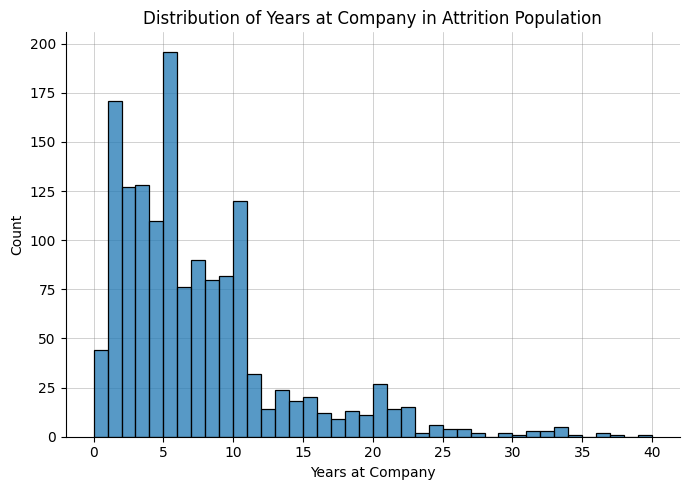

In [51]:
# Plot YearsAtCompany from attrition_pop as a histogram with bins of width 1 from 0 to 40
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    x="YearsAtCompany",
    data=attrition_pop,
    bins=np.arange(0, 41, 1),
)
sns.despine()

ax.set(
    xlabel="Years at Company",
    ylabel="Count",
    title="Distribution of Years at Company in Attrition Population",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [52]:
# Sample 400 employees from attrition_pop weighted by YearsAtCompany.
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Print the sample
display(attrition_weight)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
951,53,0.0,Travel_Rarely,1395,Research_Development,24,Master,Medical,Medium,Male,...,Excellent,High,0,11,2,Better,4,3,1,2
1197,43,0.0,Travel_Rarely,415,Sales,25,Bachelor,Medical,High,Male,...,Excellent,High,1,18,5,Better,1,0,0,0
765,36,0.0,Travel_Rarely,164,Sales,2,College,Medical,Medium,Male,...,Excellent,Medium,2,10,2,Better,10,9,9,0
1112,40,0.0,Travel_Rarely,444,Sales,2,College,Marketing,Medium,Female,...,Excellent,High,1,15,4,Better,11,8,5,10
248,28,0.0,Travel_Rarely,1117,Research_Development,8,College,Life_Sciences,Very_High,Female,...,Outstanding,Very_High,0,5,3,Better,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,35,0.0,Travel_Frequently,944,Sales,1,Bachelor,Marketing,High,Female,...,Excellent,Low,0,10,3,Best,10,7,0,8
1398,50,0.0,Travel_Rarely,1099,Research_Development,29,Master,Life_Sciences,Medium,Male,...,Excellent,Medium,1,28,2,Better,27,10,15,7
1152,36,0.0,Travel_Rarely,1223,Research_Development,8,Bachelor,Technical_Degree,High,Female,...,Excellent,Medium,3,17,2,Better,17,14,12,8
668,31,0.0,Non-Travel,1188,Sales,20,College,Marketing,Very_High,Female,...,Excellent,Very_High,1,9,2,Good,9,8,0,0


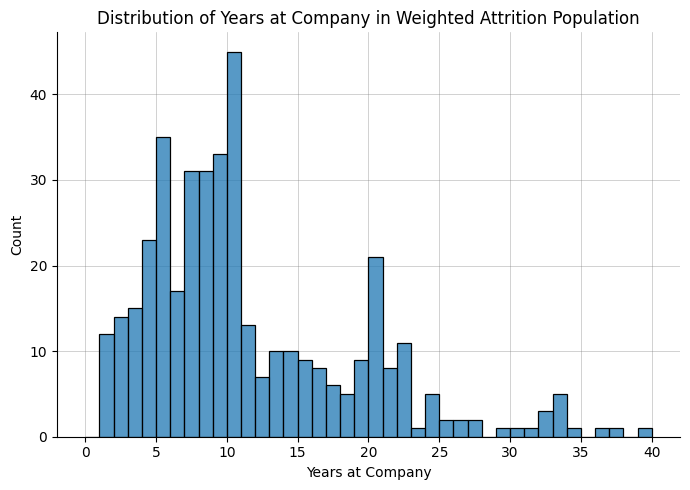

In [53]:
# Plot YearsAtCompany from attrition_weight as a histogram with bins of width 1 from 0 to 40.
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    x="YearsAtCompany",
    data=attrition_weight,
    bins=np.arange(0, 41, 1),
)
sns.despine()

ax.set(
    xlabel="Years at Company",
    ylabel="Count",
    title="Distribution of Years at Company in Weighted Attrition Population",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## Stratified vs. Cluster Sampling: A Key Distinction

While both stratified and cluster sampling involve dividing a population into subgroups, their objectives and methods are fundamentally different. Understanding this distinction is crucial for choosing the correct sampling strategy.

| Method | Goal | Process |
| :--- | :--- | :--- |
| **Stratified Sampling**| To ensure **representation** of all subgroups and increase precision. | 1. Divide population into strata (e.g., all departments in a company). <br> 2. Draw a simple random sample from **every single stratum**. |
| **Cluster Sampling** | To reduce **cost and logistical complexity**, especially with large populations. | 1. Divide population into clusters (e.g., all departments in a company). <br> 2. Draw a simple random sample of **entire clusters**. <br> 3. Draw a simple random sample of individuals **only from within the selected clusters**. |

In short, stratified sampling includes individuals from all groups, while cluster sampling includes all individuals but only from a random subset of groups.

### The Two-Stage Cluster Sampling Process

Cluster sampling is typically a **two-stage process**.

#### Stage 1: Sample the Clusters

The first step is to treat the subgroups themselves as a population and draw a simple random sample from them.

  * **Why**: To randomly select a manageable number of groups to focus on, reducing the scope of the data collection effort.
  * **How**: In Python, you can get a list of the unique group names (the clusters) and then use the `random.sample()` function to select a subset of these names.

```python
import pandas as pd
import numpy as np
import random

# Create a generic, reproducible dataset with natural clusters (e.g., departments)
np.random.seed(42)
departments = [f'Dept_{chr(65+i)}' for i in range(10)] # Dept_A, Dept_B, ...
population = pd.DataFrame({
    'department': np.random.choice(departments, 500),
    'employee_id': np.arange(500),
    'performance_score': np.random.normal(75, 10, 500)
})

# Stage 1: Sample the clusters
# Get a list of all unique departments (our clusters)
department_clusters = list(population['department'].unique())

# Set a seed for reproducibility
random.seed(42)

# Randomly sample 3 departments
selected_clusters = random.sample(department_clusters, k=3)

print(department_clusters)
print(selected_clusters)
```

#### Stage 2: Sample Individuals within the Selected Clusters

Once you have your random sample of clusters, the second step is to collect data by drawing a simple random sample of individuals from **only** the data belonging to those selected clusters.

  * **Why**: To collect the final data for analysis from the manageable subset of groups identified in Stage 1.
  * **How**: First, filter the original DataFrame to keep only the rows from the selected clusters using `.isin()`. Then, you can perform a simple random sample on this filtered subset. To sample an equal number from each selected cluster, you can chain `.groupby()` and `.sample()`.

```python
# Stage 2: Sample individuals from within the selected clusters 

# 1. Filter the population to include only the selected departments
population_subset = population[population['department'].isin(selected_clusters)]

# 2. Draw a simple random sample of 5 employees from each of the selected departments
# Using .groupby() ensures we get samples from each of our chosen clusters.
cluster_sample = population_subset.groupby('department')\
    .sample(n=5, random_state=42)

print(cluster_sample.sort_values('department'))
```

The resulting `cluster_sample` DataFrame contains data only from the three randomly chosen departments, with five employees randomly sampled from each of those.

### When to Use Cluster Sampling

Cluster sampling is particularly advantageous in the following scenarios:

  * **Geographically Dispersed Populations**: When conducting a national survey, it is far more feasible and cost-effective to randomly select a few cities (clusters) and survey individuals within them than it is to survey a few individuals from every city across the country.
  * **Lack of a Complete Population List**: If you don't have a list of all individuals in a population but you do have a list of all groups (e.g., a list of all schools in a state, but not all students), you can use cluster sampling.

This technique is a form of **multistage sampling**, and the process can be extended to more than two stages. For example, a large-scale survey might first sample states, then cities within those states, then neighbourhoods within those cities, and finally households within those neighbourhoods.

In [54]:
varieties_pop = list(coffee_ratings["variety"].unique())
print(varieties_pop)

[None, 'Other', 'Bourbon', 'Catimor', 'Ethiopian Yirgacheffe', 'Caturra', 'SL14', 'Sumatra', 'SL34', 'Hawaiian Kona', 'Yellow Bourbon', 'SL28', 'Gesha', 'Catuai', 'Pacamara', 'Typica', 'Sumatra Lintong', 'Mundo Novo', 'Java', 'Peaberry', 'Pacas', 'Mandheling', 'Ruiru 11', 'Arusha', 'Ethiopian Heirlooms', 'Moka Peaberry', 'Sulawesi', 'Blue Mountain', 'Marigojipe', 'Pache Comun']


In [55]:
import random

varieties_samp = random.sample(varieties_pop, k=3)
variety_condition = coffee_ratings["variety"].isin(varieties_samp)
coffee_ratings_cluster = coffee_ratings[variety_condition].copy()

coffee_ratings_cluster["variety"] = (
    coffee_ratings_cluster["variety"].astype("category").cat.remove_unused_categories()
)

cluster_sample = coffee_ratings_cluster.groupby("variety", observed=False).sample(
    n=5, random_state=2021, replace=True
)

display(cluster_sample)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1038,80.75,Arabica,u soe,Myanmar,myaing,None,None,Unspecified,None,3825,...,Green,2.0,"July 16th, 2016",Coffee Quality Institute,1d4c7f93129f9fb1c8a5f0ce0e36cc1cf4c2f4d7,0f62c9236e3ff5c4921da1e22a350aa99482779d,m,3825.00,3825.00,3825.00
58,85.83,Arabica,juan luis alvarado romero,Guatemala,finca el limon,None,beneficio serben,11-853-155,unicafe,4650,...,Bluish-Green,1.0,"June 5th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.32,1417.32,1417.32
935,81.42,Arabica,juan luis alvarado romero,Guatemala,nueva granada,11/326/14,beneficio nueva granada,11/326/14,"agricola nueva granada, s.a.",4500,...,Green,0.0,"March 17th, 2017",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1371.60,1371.60,1371.60
1098,80.25,Arabica,u htun htun,Myanmar,thein kone,None,None,unspecified,None,4287,...,Green,1.0,"July 16th, 2016",Coffee Quality Institute,1d4c7f93129f9fb1c8a5f0ce0e36cc1cf4c2f4d7,0f62c9236e3ff5c4921da1e22a350aa99482779d,m,4287.00,4287.00,4287.00
710,82.33,Arabica,rodrigo soto,Costa Rica,rio jorco,Tarrazu,rio jorco,5/423/0127,panamerican coffee trading,1550,...,Green,0.0,"May 17th, 2017",Specialty Coffee Association of Costa Rica,8e0b118f3cf3121ab27c5387deacdb7d4d2a60b1,5eb2b7129d9714c43825e44dc3bca9423de209e9,m,1550.00,1550.00,1550.00
1233,78.17,Arabica,sanjava coffee,Indonesia,various,sran-ijen,east java,None,pt. shriya artha nusantara,1300,...,None,1.0,"July 18th, 2018",Specialty Coffee Association of Indonesia,99fa73db21b7acd9c9ceb9dd84e409d2077d55c4,36910838db193ebdd61fa1427bac74622114c49a,m,1300.00,1300.00,1300.00
1233,78.17,Arabica,sanjava coffee,Indonesia,various,sran-ijen,east java,None,pt. shriya artha nusantara,1300,...,None,1.0,"July 18th, 2018",Specialty Coffee Association of Indonesia,99fa73db21b7acd9c9ceb9dd84e409d2077d55c4,36910838db193ebdd61fa1427bac74622114c49a,m,1300.00,1300.00,1300.00
126,84.67,Arabica,sanjava coffee,Indonesia,sran temanggung plantation,1,wet hulling,None,pt. shriya artha nusantara,1200,...,Green,7.0,"November 24th, 2017",Specialty Coffee Association of Indonesia,99fa73db21b7acd9c9ceb9dd84e409d2077d55c4,36910838db193ebdd61fa1427bac74622114c49a,m,1200.00,1200.00,1200.00
126,84.67,Arabica,sanjava coffee,Indonesia,sran temanggung plantation,1,wet hulling,None,pt. shriya artha nusantara,1200,...,Green,7.0,"November 24th, 2017",Specialty Coffee Association of Indonesia,99fa73db21b7acd9c9ceb9dd84e409d2077d55c4,36910838db193ebdd61fa1427bac74622114c49a,m,1200.00,1200.00,1200.00
126,84.67,Arabica,sanjava coffee,Indonesia,sran temanggung plantation,1,wet hulling,None,pt. shriya artha nusantara,1200,...,Green,7.0,"November 24th, 2017",Specialty Coffee Association of Indonesia,99fa73db21b7acd9c9ceb9dd84e409d2077d55c4,36910838db193ebdd61fa1427bac74622114c49a,m,1200.00,1200.00,1200.00


In [56]:
import random

# Create a list of unique JobRole values from attrition_pop, and assign to job_roles_pop.
job_roles_pop = list(attrition_pop["JobRole"].unique())

# Randomly sample four JobRole values from job_roles_pop.
job_roles_samp = random.sample(job_roles_pop, k=4)

# Subset attrition_pop for the sampled job roles by filtering for rows where JobRole is in job_roles_samp.
jobrole_condition = attrition_pop["JobRole"].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition].copy()

# Remove any unused categories from JobRole.
attrition_filtered["JobRole"] = attrition_filtered[
    "JobRole"
].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole", observed=False).sample(
    n=10, random_state=2022
)

# Print the sample
display(attrition_clust)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
812,31,0.0,Travel_Rarely,616,Research_Development,12,Bachelor,Medical,Very_High,Female,...,Excellent,High,2,10,2,Bad,9,7,8,5
1190,38,0.0,Travel_Rarely,1495,Research_Development,10,Bachelor,Medical,High,Female,...,Excellent,High,1,18,4,Better,1,0,0,0
378,33,0.0,Travel_Rarely,1069,Research_Development,1,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Low,0,6,3,Better,5,0,1,4
920,35,0.0,Travel_Frequently,1199,Research_Development,18,Master,Life_Sciences,High,Male,...,Excellent,Very_High,2,10,2,Best,10,2,0,2
917,33,0.0,Travel_Rarely,501,Research_Development,15,College,Medical,Medium,Female,...,Excellent,Low,1,10,6,Better,9,7,8,1
1058,34,0.0,Travel_Rarely,404,Research_Development,2,Master,Technical_Degree,High,Female,...,Excellent,Very_High,0,14,2,Best,14,11,4,11
1264,46,0.0,Travel_Frequently,638,Research_Development,1,Bachelor,Medical,High,Male,...,Excellent,High,1,21,5,Good,10,9,9,5
1340,44,0.0,Travel_Rarely,477,Research_Development,7,Master,Medical,Low,Female,...,Excellent,Very_High,1,24,4,Better,22,6,5,17
655,34,0.0,Travel_Rarely,1442,Research_Development,9,Bachelor,Medical,Very_High,Female,...,Excellent,Medium,0,9,3,Best,8,7,7,7
896,42,0.0,Travel_Rarely,1128,Research_Development,13,Bachelor,Medical,Medium,Male,...,Excellent,High,2,10,2,Good,0,0,0,0


## Setting the Stage: The Population

To compare sampling methods, we first need a "population" dataset and its true parameters. We will create a synthetic population with a numeric `value` and a `category` column with imbalanced group sizes. Our goal will be to see how well different sampling techniques can estimate the true overall mean and the true mean for each category.

```python
import pandas as pd
import numpy as np
import random

# Create a generic, reproducible population DataFrame with imbalanced categories
np.random.seed(42)
population_size = 1500
proportions = {'Group A': 0.6, 'Group B': 0.3, 'Group C': 0.1}
means = {'Group A': 50, 'Group B': 70, 'Group C': 90}
categories = np.random.choice(list(proportions.keys()), size=population_size, p=list(proportions.values()))
population = pd.DataFrame({'category': categories})
population['value'] = population['category'].apply(lambda cat: np.random.normal(loc=means[cat], scale=5))

# Calculate the "Ground Truth" Population Parameters 
# Overall population mean
pop_mean_overall = population['value'].mean()
# Mean for each subgroup
pop_means_by_group = population.groupby('category')['value'].mean()

print(f"Overall Mean: {pop_mean_overall:.4f}\n")
print(pop_means_by_group)
```

### Review and Comparison of Sampling Techniques

We will now draw a sample of approximately 300 from our population of 1500 using each of the three methods and compare how well their point estimates match the true population parameters.

#### 1 Simple Random Sampling (SRS)

SRS gives every row an equal chance of being selected. It is unbiased but provides no guarantees about subgroup representation.

```python
# Simple Random Sample 
srs = population.sample(n=300, random_state=42)

# Point Estimates from SRS 
srs_mean_overall = srs['value'].mean()
srs_means_by_group = srs.groupby('category')['value'].mean()

print(f"Overall Mean Estimate: {srs_mean_overall:.4f}\n")
print(srs_means_by_group)
```

**Analysis**: The overall mean from the SRS is a good estimate of the true population mean. The group means are also reasonably close, but notice that the estimate for the small `Group C` might show more variability compared to a stratified approach.

#### 2 Proportional Stratified Sampling

Stratified sampling ensures the proportions of the subgroups in the sample match the proportions in the population, often leading to more precise estimates.

```python
# Proportional Stratified Sample 
# We sample 20% (n=300/1500) from each category
stratified_sample = population.groupby('category', group_keys=False)\
    .sample(frac=0.20, random_state=42)

# Point Estimates from Stratified Sample 
strat_mean_overall = stratified_sample['value'].mean()
strat_means_by_group = stratified_sample.groupby('category')['value'].mean()

print(f"Overall Mean Estimate: {strat_mean_overall:.4f}\n")
print(strat_means_by_group)
```

**Analysis**: The overall mean is again a very good estimate. The estimates for the group means are often more precise (closer to the true values) than with SRS because we have eliminated the risk of under-sampling a group by chance.

#### 3 Cluster Sampling

Cluster sampling is a two-stage process where we first randomly select groups (clusters) and then sample individuals only from within those groups. It is efficient but can be less precise if the selected clusters are not representative.

```python
# Cluster Sample 
# Stage 1: Randomly select 2 out of the 3 departments (clusters)
all_clusters = list(population['category'].unique())
random.seed(42)
selected_clusters = random.sample(all_clusters, k=2)

# Stage 2: Filter for selected clusters and take a simple random sample of 150 from each
cluster_subset = population[population['category'].isin(selected_clusters)]
cluster_sample = cluster_subset.groupby('category')\
    .sample(n=150, random_state=42)
    
# Point Estimates from Cluster Sample 
clust_mean_overall = cluster_sample['value'].mean()
clust_means_by_group = cluster_sample.groupby('category')['value'].mean()

print(f"\nSelected clusters: {selected_clusters}")
print(f"Overall Mean Estimate: {clust_mean_overall:.4f}\n")
print(clust_means_by_group)
```

**Analysis**: The overall mean estimate's accuracy is highly dependent on the clusters chosen. If we happened to pick the two groups with the lowest means, our estimate would be biased low. The most significant result is that **we have no information at all about the clusters that were not selected** (`Group A` in this case).


### Summary and Recommendations

| Method | Best For | Strengths | Weaknesses |
| :--- | :--- | :--- | :--- |
| **Simple Random** | General purpose, when subgroups are not a primary concern. | Unbiased, simple to implement. | May under-represent or miss small subgroups by chance. |
| **Stratified** | **Precision** and **representation** of all subgroups. | Guarantees all groups are represented; often produces more precise estimates. | Requires knowledge of all strata in the population. |
| **Cluster** | **Efficiency** and **cost reduction** with large populations. | Logistically simpler and cheaper than sampling every group. | Can be less precise; results depend heavily on the representativeness of the selected clusters. |

In [57]:
# Get a list of the top 6 most frequent countries of origin in the coffee_ratings dataset.
top_counted_countries = (
    coffee_ratings["country_of_origin"].value_counts().head(6).index.tolist()
)

# Create a boolean mask: True for rows where the country is in the top 6, False otherwise.
subset_condition = coffee_ratings["country_of_origin"].isin(top_counted_countries)

# Filter the DataFrame to include only rows from the top 6 countries.
coffee_ratings_top = coffee_ratings[subset_condition]

# Show the shape (number of rows and columns) of the filtered DataFrame.
coffee_ratings_top.shape

(880, 43)

In [58]:
# Review of simple random sampling
coffee_ratings_srs = coffee_ratings_top.sample(frac=1 / 3, random_state=2021)
coffee_ratings_srs.shape

(293, 43)

In [59]:
# Review of cluster sampling
# Import the random module to enable random selection of clusters (groups).
import random

# Randomly select 2 countries (clusters) from the list of top-counted countries.
top_countries_samp = random.sample(top_counted_countries, k=2)

# Create a boolean mask: True for rows where 'country_of_origin' is one of the sampled clusters.
top_condition = coffee_ratings_top["country_of_origin"].isin(top_countries_samp)

# Filter the DataFrame to include only rows from the selected clusters (countries).
coffee_ratings_cluster = coffee_ratings_top[top_condition].copy()

# Convert 'country_of_origin' to a categorical type and remove any unused categories.
# This ensures only the selected clusters are present in the category list.
coffee_ratings_cluster["country_of_origin"] = (
    coffee_ratings_cluster["country_of_origin"]
    .astype("category")
    .cat.remove_unused_categories()
)

# For each selected cluster, randomly sample a fixed number of rows (with replacement).
# The sample size per cluster is set to the total number of rows in coffee_ratings_top divided by 6.
# This simulates equal-sized sampling from each chosen cluster.
coffee_ratings_clust = coffee_ratings_cluster.groupby(
    "country_of_origin", observed=True
).sample(n=len(coffee_ratings_top) // 6, replace=True)

# Display the shape (number of rows and columns) of the final cluster sample.
coffee_ratings_clust.shape

(292, 43)

Comparing Sampling Methods - Calculating Mean Cup Points

In [60]:
simple_random_sample = coffee_ratings_srs["total_cup_points"].mean()
population = coffee_ratings_top["total_cup_points"].mean()
stratified_sample = coffee_ratings_strat["total_cup_points"].mean()
cluster_sample = coffee_ratings_clust["total_cup_points"].mean()

print(f"Cup points mean from population sample: {population}")
print(f"Cup points mean from simple sample: {simple_random_sample}")
print(f"Cup points mean from stratified sample: {stratified_sample}")
print(f"Cup points mean from cluster sample: {cluster_sample}")

Cup points mean from population sample: 81.94700000000002
Cup points mean from simple sample: 81.91331058020478
Cup points mean from stratified sample: 82.30136363636365
Cup points mean from cluster sample: 82.24150684931507


### Mean cup points by Country 

#### Population 

In [61]:
# Population
coffee_ratings_top.groupby("country_of_origin")["total_cup_points"].mean()

country_of_origin
Brazil                    82.405909
Colombia                  83.106557
Guatemala                 81.846575
Mexico                    80.890085
Taiwan                    82.001333
United States (Hawaii)    81.820411
Name: total_cup_points, dtype: float64

#### Simple Sample

In [62]:
# Simple sample
coffee_ratings_srs.groupby("country_of_origin")["total_cup_points"].mean()

country_of_origin
Brazil                    82.251875
Colombia                  82.961014
Guatemala                 81.392917
Mexico                    81.152000
Taiwan                    81.957391
United States (Hawaii)    81.766400
Name: total_cup_points, dtype: float64

#### Stratified Sample

In [63]:
coffee_ratings_strat.groupby("country_of_origin")["total_cup_points"].mean()

country_of_origin
Brazil                    83.680000
Colombia                  83.102778
Guatemala                 82.157778
Mexico                    81.489583
Taiwan                    81.750000
United States (Hawaii)    81.462857
Name: total_cup_points, dtype: float64

#### Clustered Sample

In [64]:
coffee_ratings_clust.groupby("country_of_origin", observed=False)[
    "total_cup_points"
].mean()

country_of_origin
Brazil       82.532260
Guatemala    81.950753
Name: total_cup_points, dtype: float64

In [65]:
import random

# Perform simple random sampling on attrition_pop to get one-quarter of the population, setting the seed to 2022.
attrition_srs = attrition_pop.sample(frac=0.25, random_state=2022)

# Perform stratified sampling on attrition_pop to sample one-quarter of each RelationshipSatisfaction group, setting the seed to 2022.
attrition_strat = attrition_pop.groupby(
    "RelationshipSatisfaction", observed=True
).sample(frac=0.25, random_state=2022)

# Create a list of unique values from attrition_pop's RelationshipSatisfaction column.
satisfaction_unique = list(attrition_pop["RelationshipSatisfaction"].unique())

# Randomly sample satisfaction_unique to get two values.
satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Subset the population for rows where RelationshipSatisfaction is in satisfaction_samp and clear any unused categories from RelationshipSatisfaction; assign to attrition_clust_prep.
satis_condition = attrition_pop["RelationshipSatisfaction"].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop.loc[satis_condition].copy()
attrition_clust_prep["RelationshipSatisfaction"] = attrition_clust_prep[
    "RelationshipSatisfaction"
].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction").sample(
    n=len(attrition_pop) // 4, random_state=2022, replace=True
)

C:\Users\jhonm\AppData\Local\Temp\ipykernel_25900\1403743450.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction").sample(


In [66]:
# Group attrition_pop by RelationshipSatisfaction levels and calculate the mean of Attrition for each level.
mean_attrition_pop = attrition_pop.groupby("RelationshipSatisfaction", observed=True)[
    "Attrition"
].mean()

display(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64

In [67]:
# Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the simple random sample, attrition_srs.
mean_attrition_srs = attrition_srs.groupby("RelationshipSatisfaction", observed=True)[
    "Attrition"
].mean()
display(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64

In [68]:
# Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the stratified sample, attrition_strat.
mean_attrition_strat = attrition_strat.groupby(
    "RelationshipSatisfaction", observed=True
)["Attrition"].mean()
display(mean_attrition_strat)

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64

In [69]:
# Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the cluster sample, attrition_clust.
mean_attrition_clust = attrition_clust.groupby(
    "RelationshipSatisfaction", observed=True
)["Attrition"].mean()
display(mean_attrition_clust)

RelationshipSatisfaction
Low       0.204360
Medium    0.174387
Name: Attrition, dtype: float64

## Defining and Calculating Relative Error

A point estimate, such as a sample mean, is our best guess for an unknown population parameter. However, due to random sampling variability, the point estimate will rarely be exactly equal to the true parameter. The **relative error** provides a standardized way to measure the magnitude of this discrepancy.

It is calculated as the absolute difference between the population parameter and the point estimate, divided by the population parameter.

$$\text{Relative Error} = \frac{\text{Population Parameter} - \text{Point Estimate}}{\text{Population Parameter}}$$

To express this as a percentage, which is often more intuitive, you simply multiply the result by 100.

```python
# Assume we know the population parameter and have a point estimate from a sample
population_mean = 82.15
sample_mean = 83.03

# Calculate the relative error as a percentage
relative_error_pct = 100 * abs(population_mean - sample_mean) / population_mean

print(f"The relative error of the point estimate is: {relative_error_pct:.2f}%")
```
### The Relationship Between Sample Size and Relative Error

The accuracy of a point estimate is directly related to the size of the sample from which it was calculated. This relationship is governed by the **law of large numbers**, which states that as the sample size grows, the sample mean will converge to the true population mean.

This leads to several key properties when observing the relative error as a function of sample size:

1.  **High Variability for Small Samples**: For very small sample sizes, the relative error is often large and highly volatile. The point estimate is very sensitive to which specific individuals are chosen by chance, so different small samples can yield wildly different estimates.

2.  **Diminishing Returns**: The most significant reduction in error occurs when moving from a small sample to a moderately sized one. The improvement in accuracy flattens out as the sample size gets larger. For example, increasing the sample size from 10 to 100 will typically reduce the error far more than increasing it from 1000 to 1100.

3.  **Convergence to Zero**: As the sample size approaches the total population size, the sample becomes a more and more accurate reflection of the population, and the relative error approaches zero. When the sample size equals the population size, the error is exactly zero.


### Visualizing the Effect of Sample Size in Python

We can demonstrate this relationship empirically by repeatedly sampling a population with increasing sample sizes and plotting the resulting relative error.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a synthetic "population" DataFrame
np.random.seed(42)
population = pd.DataFrame({
    'value': np.random.normal(loc=100, scale=10, size=1000)
})
# Calculate the true population parameter
population_mean = population['value'].mean()

# 2. Define a range of sample sizes to test
sample_sizes = np.arange(10, 1001, 10)

# 3. Loop through sample sizes, calculate point estimates, and store relative errors
relative_errors = []
for size in sample_sizes:
    # Draw a simple random sample
    sample = population.sample(n=size, random_state=size) # Use size as seed for variation
    # Calculate the point estimate
    sample_mean = sample['value'].mean()
    # Calculate and store the relative error
    relative_error = abs(population_mean - sample_mean) / population_mean
    relative_errors.append(relative_error)

# Create a DataFrame for plotting
errors_df = pd.DataFrame({
    'sample_size': sample_sizes,
    'relative_error': relative_errors
})

# 4. Plot the results
fig, ax = plt.subplots(figsize=(7, 5))
sns.lineplot(data=errors_df, x='sample_size', y='relative_error', ax=ax)
ax.set(
    title="Relative Error of the Sample Mean vs. Sample Size",
    xlabel="Sample Size",
    ylabel="Relative Error"
)
ax.grid(True, linewidth=0.5, alpha=0.7, color="grey)
sns.despine()
plt.tight_layout()
plt.show()
```

The plot visually confirms the principles. The relative error is noisy and high for small sample sizes on the left. It drops steeply at first and then begins to flatten out, showing diminishing returns as the sample size increases. Finally, it converges towards zero as the sample size approaches the full population size on the right.

In [70]:
# Sample size in number of rows
print(f"Lenght of n = 300: {len(coffee_ratings.sample(n=300))}")
print(f"Lenght of frac = 0.25: {len(coffee_ratings.sample(frac=0.25))}")

Lenght of n = 300: 300
Lenght of frac = 0.25: 334


In [71]:
# Varios sample sizes
population_mean = coffee_ratings["total_cup_points"].mean()
sample_ten = coffee_ratings.sample(n=30)["total_cup_points"].mean()
sample_hund = coffee_ratings.sample(n=100)["total_cup_points"].mean()
sample_thous = coffee_ratings.sample(n=1000)["total_cup_points"].mean()
sample_10k = coffee_ratings.sample(n=10_000, replace=True)["total_cup_points"].mean()

print(f"Original mean: {population_mean:.4f}")
print(f"Ten-size mean: {sample_ten:.4f}")
print(f"Hundred-size mean: {sample_hund:.4f}")
print(f"Thousand-size mean: {sample_thous:.4f}")
print(f"10k-size mean: {sample_10k:.4f}")

Original mean: 82.1512
Ten-size mean: 83.0810
Hundred-size mean: 82.4730
Thousand-size mean: 82.1712
10k-size mean: 82.1649


In [72]:
# Relative error as percentage
rel_error_pct = 100 * abs(population_mean - sample_thous) / population_mean
print(rel_error_pct)

0.024280486117391607


### Calculating relative errors
The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

In [73]:
# Generate a simple random sample from attrition_pop of fifty rows, setting the seed to 2022.
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee Attrition in the sample.
mean_attrition_srs50 = attrition_srs50["Attrition"].mean()

# Calculate the relative error between mean_attrition_srs50 and mean_attrition_pop as a percentage.
rel_error_pct50 = (
    100 * abs(mean_attrition_pop - mean_attrition_srs50) / mean_attrition_pop
)

# Print rel_error_pct50
print(rel_error_pct50)

RelationshipSatisfaction
Low          70.947368
Medium       59.600000
High         61.211268
Very_High    59.500000
Name: Attrition, dtype: float64


In [74]:
overall_attrition_mean = attrition_pop["Attrition"].mean()
# Define the range of sample sizes to test; this is necessary to observe how relative error changes as sample size increases
sample_sizes = np.arange(1, 1001, 3)

relative_errors = []
for size in sample_sizes:
    # vary random_state for different draws
    sample = attrition_pop.sample(n=size, random_state=size)
    mean_sample = sample["Attrition"].mean()
    rel_error = abs(overall_attrition_mean - mean_sample) / overall_attrition_mean
    relative_errors.append({"sample_size": size, "relative_error": rel_error})

errors = pd.DataFrame(relative_errors)

In [75]:
# Calculate the relative error percentage again. This time, use a simple random sample of one hundred rows of attrition_pop.
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100["Attrition"].mean()

# Calculate the relative error percentage
rel_error_pct100 = (
    100 * abs(mean_attrition_pop - mean_attrition_srs100) / mean_attrition_pop
)

# Print rel_error_pct100
print(rel_error_pct100)

RelationshipSatisfaction
Low          27.368421
Medium        1.000000
High          3.028169
Very_High     1.250000
Name: Attrition, dtype: float64


### Relative error vs. sample size
Properties:
 - Really noise, particularly for small samples
 - Amplitude is initially steep, then flattens
 - Relative error decreases to zero (when the sample size = population)


In [76]:
# Rebuild errors DataFrame if it is missing / malformed
if (
    "errors" not in globals()
    or not isinstance(errors, pd.DataFrame)
    or {"sample_size", "relative_error"} - set(errors.columns)
):
    # If original components exist, rebuild; otherwise raise a clear error
    if "relative_errors" in globals():
        errors = pd.DataFrame(relative_errors)
    else:
        raise RuntimeError(
            "Cannot reconstruct `errors`: source list `relative_errors` not found."
        )

# Ensure proper dtypes and no nested objects
errors = errors[["sample_size", "relative_error"]].copy()
errors["sample_size"] = pd.to_numeric(errors["sample_size"], errors="coerce")
errors["relative_error"] = pd.to_numeric(errors["relative_error"], errors="coerce")

In [77]:
errors

,sample_size,relative_error
0,1,1.000000
1,4,1.000000
2,7,0.772152
3,10,0.379747
4,13,0.908471
...,...,...
329,988,0.086071
330,991,0.029876
331,994,0.029595
332,997,0.020276


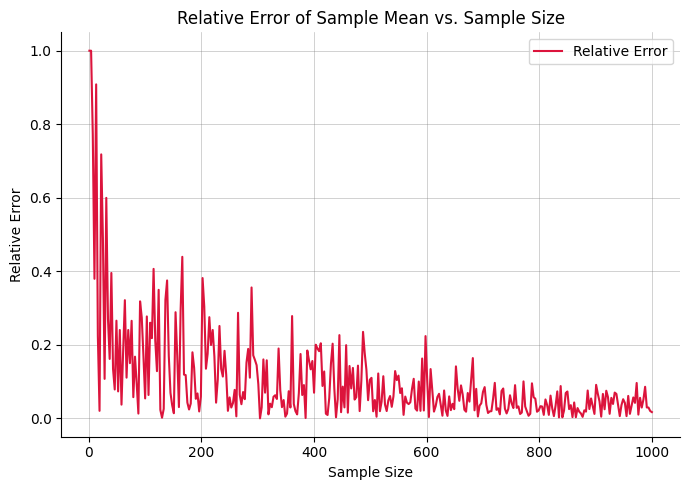

In [78]:
# Plot relative error of sample mean vs. sample size
fig, ax = plt.subplots(figsize=(7, 5))

# Draw a line plot of relative error for each sample size
sns.lineplot(x="sample_size", y="relative_error", data=errors, ax=ax, color="crimson")
sns.despine()

# Set axis labels and title
ax.set(
    xlabel="Sample Size",
    ylabel="Relative Error",
    title="Relative Error of Sample Mean vs. Sample Size",
    label="Relative Error",
)

# Add grid and legend for clarity
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)
ax.legend(labels=["Relative Error"])

plt.tight_layout()
plt.show()

## The Problem of Sampling Variability

When you take a random sample from a population and calculate a point estimate, such as the mean, you get a single value. However, if you were to repeat this process, you would get a slightly different random sample and, therefore, a slightly different point estimate. This phenomenon is known as **sampling variability**.

```python
import pandas as pd
import numpy as np

# Create a generic "population" DataFrame
population = pd.DataFrame({'value': np.random.normal(loc=100, scale=10, size=5000)})

# Take three different random samples of the same size and calculate their means
mean_1 = population['value'].sample(n=30, random_state=1).mean()
mean_2 = population['value'].sample(n=30, random_state=2).mean()
mean_3 = population['value'].sample(n=30, random_state=3).mean()

print(f"Mean of sample 1: {mean_1:.4f}")
print(f"Mean of sample 2: {mean_2:.4f}")
print(f"Mean of sample 3: {mean_3:.4f}")
```

Because each sample is different, each point estimate is also different. A point estimate is not a single, fixed number but a random variable that has its own distribution. To understand the properties of our estimator, we need to understand this distribution.

### Creating a Sampling Distribution via Simulation

We can approximate the distribution of a point estimate through simulation. The process involves repeatedly sampling from the population and calculating the point estimate for each sample. This is a foundational technique in statistics.

**The Process:**

1.  Initialize an empty list to store the "replicates" of our point estimate.
2.  Create a loop that runs a large number of times (e.g., 1000 or more).
3.  Inside the loop:
    a. Draw a random sample of a fixed size `n` from the population.
    b. Calculate the point estimate (e.g., the mean) for that sample.
    c. Append the estimate to our list.

The resulting list of point estimates forms our empirical **sampling distribution**.

```python
# Simulate a sampling distribution 
point_estimate_replicates = []
# Repeat the process 1000 times
for i in range(1000):
    sample_mean = population['value'].sample(n=30, random_state=i).mean()
    point_estimate_replicates.append(sample_mean)

# Visualize the sampling distribution with a histogram
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(point_estimate_replicates, bins=30, edgecolor='black', ax=ax)
ax.set_title("Sampling Distribution of the Mean (Sample Size n=30)")
ax.set_xlabel("Sample Mean Value")
ax.set_ylabel("Frequency")
ax.grid(True, linestyle='--')
plt.show()
```

The histogram shows the range and frequency of the different sample means we could expect to get from a sample of size 30.

### The Effect of Sample Size

A key property of sampling distributions is that their **spread** is determined by the **sample size (`n`)** used to generate them. As the sample size increases, the sampling distribution becomes narrower and more tightly centered around the true population mean.

  * **Why?** Larger samples are more representative of the population. Their means will be more consistently clustered around the true population mean, leading to less variability from one sample to the next. The standard deviation of a sampling distribution, known as the **standard error**, decreases as the sample size increases.

Let's visualize this by comparing the sampling distribution for a small sample size (`n=6`) with that of a larger one (`n=150`).

```python
def generate_sampling_distribution(population_df, sample_size, num_replicates):
    """A helper function to generate a sampling distribution."""
    replicates = []
    for i in range(num_replicates):
        sample_mean = population_df['value'].sample(n=sample_size, random_state=i).mean()
        replicates.append(sample_mean)
    return replicates

# Generate distribution for a small sample size
dist_small_n = generate_sampling_distribution(population, sample_size=6, num_replicates=1000)

# Generate distribution for a larger sample size
dist_large_n = generate_sampling_distribution(population, sample_size=150, num_replicates=1000)

import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for n=6
sns.histplot(dist_small_n, bins=30, ax=axes[0], edgecolor='black')
axes[0].set_title("Sampling Distribution (Sample Size n=6)")
axes[0].set_xlabel("Sample Mean")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(90, 110)

# Plot for n=150
sns.histplot(dist_large_n, bins=30, ax=axes[1], edgecolor='black')
axes[1].set_title("Sampling Distribution (Sample Size n=150)")
axes[1].set_xlabel("Sample Mean")
axes[1].set_xlim(90, 110)

plt.show()
```

The comparison clearly shows that the sampling distribution for `n=150` is much narrower and more tightly packed around the true population mean (which is 100) than the distribution for `n=6`. This illustrates a fundamental concept: **increasing the sample size reduces the variability of your point estimates, leading to more precise results.**

In [79]:
np.random.seed(42)
mean_cup_points_1000 = [
    coffee_ratings.sample(n=30)["total_cup_points"].mean() for _ in range(1000)
]
display(mean_cup_points_1000[:6])

[np.float64(82.05266666666667),
 np.float64(82.10866666666668),
 np.float64(82.79433333333333),
 np.float64(82.28366666666668),
 np.float64(82.262),
 np.float64(82.29500000000002)]

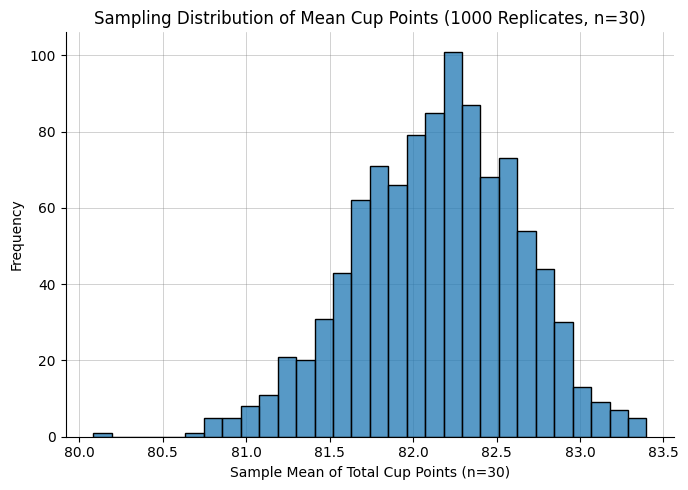

In [80]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(mean_cup_points_1000, bins=30, ax=ax)
sns.despine()

ax.set(
    xlabel="Sample Mean of Total Cup Points (n=30)",
    ylabel="Frequency",
    title="Sampling Distribution of Mean Cup Points (1000 Replicates, n=30)",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [81]:
# Replicate the provided code so that it runs 500 times. Assign the resulting list of sample means to mean_attritions.
mean_attritions = [
    attrition_pop.sample(n=60)["Attrition"].mean() for draw in range(500)
]
# Print out the first few entries of the list
display(mean_attritions[0:5])

[np.float64(0.2),
 np.float64(0.11666666666666667),
 np.float64(0.15),
 np.float64(0.18333333333333332),
 np.float64(0.15)]

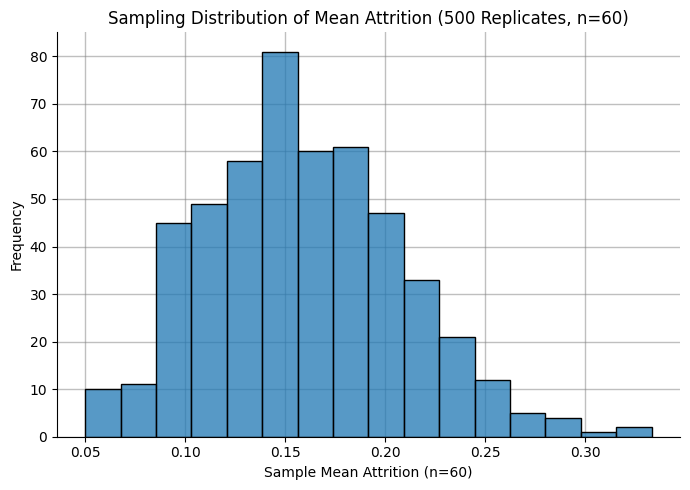

In [82]:
# Draw a histogram of the mean_attritions list with 16 bins.
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(mean_attritions, bins=16, ax=ax)
sns.despine()

ax.set(
    xlabel="Sample Mean Attrition (n=60)",
    ylabel="Frequency",
    title="Sampling Distribution of Mean Attrition (500 Replicates, n=60)",
)
ax.grid(True, alpha=0.5, linewidth=1, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## Exact vs. Approximate Sampling Distributions

A **sampling distribution** is the probability distribution of a statistic (like the mean) calculated over all possible samples of a given size from a population.

  * **Exact Sampling Distribution**: For simple populations, we can enumerate every single possible sample, calculate the statistic for each one, and find the exact probability distribution. Consider the population of outcomes from rolling two fair six-sided dice. There are $6^2 = 36$ possible outcomes. We can list them all, calculate the mean of each pair, and build the exact sampling distribution of the mean.

  * **The Problem of Combinatorial Explosion**: This approach quickly becomes impossible. For four dice, there are $6^4 = 1,296$ outcomes. For ten dice, there are over 60 million. The number of possible outcomes grows exponentially, making it computationally infeasible to calculate the exact distribution.

This is where approximation becomes necessary.

### The Solution: Approximation via Simulation

Since we cannot analyze *every* possible sample, we can instead analyze a *large number* of randomly generated samples. The core idea is that if we generate enough random samples, the distribution of their statistics will closely approximate the true, exact sampling distribution. This is a foundational concept in computational statistics and is often referred to as a **Monte Carlo method**.

In Python, the `numpy.random.choice()` function is the ideal tool for simulating the process of drawing a random sample from a population.

  * **`a`**: The population to sample from (e.g., `[1, 2, 3, 4, 5, 6]`).
  * **`size`**: The size of the single sample to draw (e.g., `size=4` for four dice rolls).
  * **`replace=True`**: This allows an outcome to be selected more than once, which is necessary for simulating independent events like multiple dice rolls.


### Generating an Approximate Sampling Distribution in Python

The process involves repeating the sampling process many times and collecting the results.

1.  Define the population and the parameters of the simulation.
2.  Loop a large number of times (e.g., 10,000).
3.  In each iteration, draw one random sample and calculate the statistic.
4.  Store the result.
5.  Visualize the collected statistics in a histogram.

```python
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the population (a fair six-sided die) and simulation parameters
population = [1, 2, 3, 4, 5, 6]
sample_size = 4
num_replicates = 10000

# 2. & 3. Loop, sample, and calculate the statistic
np.random.seed(42) # for reproducibility
sample_means = []
for i in range(num_replicates):
    # Draw one sample of four dice rolls
    sample = np.random.choice(population, size=sample_size, replace=True)
    # Calculate the mean of this sample and store it
    sample_means.append(np.mean(sample))

# 4. Visualize the approximate sampling distribution
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(sample_means, bins=np.arange(1, 6.25, 0.25), edgecolor='black', ax=ax)
ax.set_title(f"Approximate Sampling Distribution of the Mean\n(Sample Size n={sample_size}, {num_replicates} Replicates)")
ax.set_xlabel("Mean of Four Dice Rolls")
ax.set_ylabel("Frequency")
ax.grid(True, linestyle='--')
plt.show()
```

The resulting histogram is our **approximate sampling distribution**. It shows the likelihood of getting different average values when rolling four dice.

### Comparing the Exact and Approximate Distributions

To prove that this approximation is valid, we can compare it to the exact distribution for a simple case, like the mean of two dice.

```python
import pandas as pd

# 1. Calculate the EXACT distribution for two dice 
die_outcomes = [1, 2, 3, 4, 5, 6]
# Create a DataFrame of all 36 possible outcomes
exact_outcomes = pd.MultiIndex.from_product([die_outcomes, die_outcomes], names=['die1', 'die2'])\
    .to_frame(index=False)
exact_outcomes['mean_roll'] = (exact_outcomes['die1'] + exact_outcomes['die2']) / 2
# Calculate the probability of each mean
exact_distribution = exact_outcomes['mean_roll'].value_counts(normalize=True).sort_index()

# 2. Generate the APPROXIMATE distribution for two dice 
np.random.seed(42)
approx_means_2_dice = [np.mean(np.random.choice(die_outcomes, size=2, replace=True)) for _ in range(10000)]

# 3. Visualize the comparison using seaborn OOP 
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the exact distribution as a bar chart
exact_distribution.plot(kind='bar', label='Exact Distribution', color='skyblue', edgecolor='black', ax=ax)

# Plot the approximate distribution as a histogram on the same axes
sns.histplot(approx_means_2_dice, bins=np.arange(0.75, 6.5, 0.5), stat='density', alpha=0.6, label='Approximate Distribution', color='salmon', ax=ax)

ax.set_title("Exact vs. Approximate Sampling Distribution (Mean of Two Dice)")
ax.set_xlabel("Mean Roll")
ax.set_ylabel("Probability / Density")
ax.legend()
ax.grid(axis='y', linestyle='--')
plt.show()
```

The plot shows that the shape of the simulated (approximate) distribution is an excellent match for the true (exact) distribution, demonstrating the power and validity of using simulation when exact calculation is impossible.

In [83]:
# The definition of the expand_grid() function is provided in the pandas documentation (https://pandas.pydata.org/pandas-docs/version/0.17.1/cookbook.html#creating-example-data).
import itertools


def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

In [84]:
# Create a DataFrame representing all possible combinations of five dice rolls,
# where each die can take values from 1 to 8.
# This uses expand_grid to generate the Cartesian product of die values.
dice = expand_grid({f"die{i}": np.arange(1, 9) for i in range(1, 6)})

# Display the resulting DataFrame to inspect the combinations.
display(dice)

,die1,die2,die3,die4,die5
0,1,1,1,1,1
1,1,1,1,1,2
2,1,1,1,1,3
3,1,1,1,1,4
4,1,1,1,1,5
...,...,...,...,...,...
32763,8,8,8,8,4
32764,8,8,8,8,5
32765,8,8,8,8,6
32766,8,8,8,8,7


In [85]:
# Get a list of all column names in the dice DataFrame, so we can calculate the mean across all dice rolls for each row.
cols = dice.columns.to_list()

# Calculate the mean value of the five dice rolls for each row and store it in a new column 'mean_roll'.
dice["mean_roll"] = dice[cols].mean(axis=1).astype("category")

# Print result
display(dice)

,die1,die2,die3,die4,die5,mean_roll
0,1,1,1,1,1,1.0
1,1,1,1,1,2,1.2
2,1,1,1,1,3,1.4
3,1,1,1,1,4,1.6
4,1,1,1,1,5,1.8
...,...,...,...,...,...,...
32763,8,8,8,8,4,7.2
32764,8,8,8,8,5,7.4
32765,8,8,8,8,6,7.6
32766,8,8,8,8,7,7.8


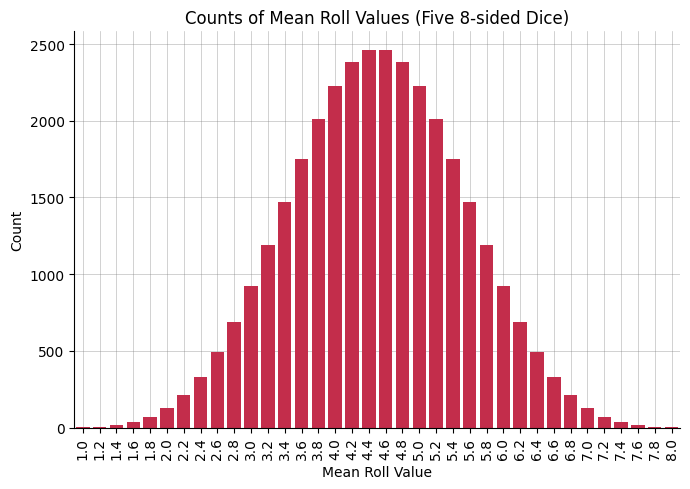

In [86]:
# # Ensure the mean_roll column exists
# if "mean_roll" not in dice.columns:
#     cols = dice.columns.to_list()
#     dice["mean_roll"] = dice[cols].mean(axis=1).astype("category")

# Count the occurrences of each mean_roll value and sort by mean_roll
mean_counts = dice["mean_roll"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(
    x=mean_counts.index.astype(str).astype(float),
    y=mean_counts.values,
    ax=ax,
    color="crimson",
)
sns.despine()

ax.set(
    xlabel="Mean Roll Value",
    ylabel="Count",
    title="Counts of Mean Roll Values (Five 8-sided Dice)",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

### Generating an approximate sampling distribution
Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is `8**5`, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

In [87]:
# Sample one to eight, five times, with replacement. Assign to five_rolls.
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

4.6


In [88]:
# Replicate the sampling code 1000 times, assigning each result to the list sample_means_1000.
sample_means_1000 = [
    np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    for i in range(1000)
]

# Print the first 10 entries of the result
display(sample_means_1000[0:10])

[np.float64(3.2),
 np.float64(5.0),
 np.float64(4.2),
 np.float64(6.4),
 np.float64(6.2),
 np.float64(4.4),
 np.float64(3.0),
 np.float64(2.8),
 np.float64(4.8),
 np.float64(6.4)]

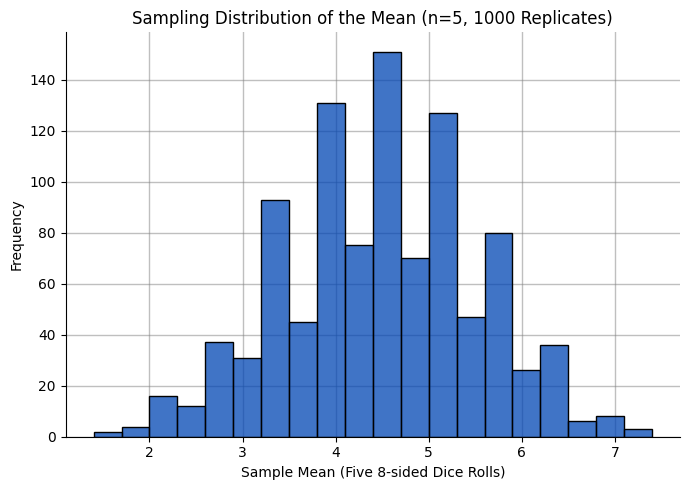

In [89]:
# Plot sample_means_1000 as a histogram with 20 bins.
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(sample_means_1000, bins=20, color="#0045b4", ax=ax)
sns.despine()

ax.set(
    xlabel="Sample Mean (Five 8-sided Dice Rolls)",
    ylabel="Frequency",
    title="Sampling Distribution of the Mean (n=5, 1000 Replicates)",
)
ax.grid(True, alpha=0.5, linewidth=1, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## The Central Limit Theorem (CLT)

The Central Limit Theorem is one of the most fundamental concepts in statistics. It describes the properties of the sampling distribution of the sample mean. When the sample size (`n`) is reasonably large (typically `n ≥ 30`), the CLT gives us three key results:

1.  **Normality**: The sampling distribution of the sample mean will be **approximately normal**, even if the original population's distribution is not normal. This is a powerful result because it allows us to use normal probability theory to make inferences.
2.  **Mean**: The mean of the sampling distribution will be equal to the mean of the population ($\\mu$).
3.  **Variance and Spread**: The spread of the sampling distribution decreases as the sample size `n` increases. This means that point estimates from larger samples are more precise and consistent.

The provided image, showing that the histograms of sample means become progressively narrower as the sample size increases from 5 to 320, is a perfect visual demonstration of this third principle.

### The Standard Error

The **standard error (SE)** is the specific name for the standard deviation of a sampling distribution. It is the single most important measure of the precision of a point estimate. A small standard error indicates that our point estimates (e.g., sample means) would be closely clustered together if we were to repeat the sampling process, suggesting a high degree of precision.

The CLT provides a mathematical formula to calculate the standard error of the mean ($SE\_{\\bar{x}}$) without having to perform a full simulation:

$$SE_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

Where:

  * $\\sigma$ is the **population standard deviation**.
  * `n` is the **sample size**.

This formula mathematically confirms the observations from the CLT: as the sample size `n` increases, the denominator gets larger, and therefore the standard error decreases.

### Practical Calculation and Degrees of Freedom (`ddof`)

In most real-world scenarios, we do not know the true population standard deviation, $\\sigma$. Instead, we must estimate it using the **sample standard deviation**, denoted by `s`.

When calculating standard deviation, there is a subtle but important distinction between a population and a sample, which is controlled by the "delta degrees of freedom" (`ddof`) parameter in pandas and NumPy.

  * **Population Standard Deviation ($\\sigma$)**: The formula divides the sum of squared differences by the total number of observations, `N`. To calculate this in Python, you must specify **`ddof=0`**.
  * **Sample Standard Deviation (`s`)**: To get an unbiased estimate of the population's $\\sigma$ from a sample, the formula must divide by `n-1`, where `n` is the sample size. This `n-1` term is the "degrees of freedom." This is the default behaviour in pandas and NumPy, corresponding to **`ddof=1`**.

Therefore, the estimated standard error is calculated as:
$$\hat{SE}_{\bar{x}} = \frac{s}{\sqrt{n}}$$

### A Complete Example in Python

Let's verify these concepts with a simulation. We will create a population, calculate its true parameters, and then see if the results from a simulated sampling distribution match the theoretical formulas.

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create a Population (we will make it non-normal to show the CLT's power)
population = pd.DataFrame({'value': np.random.uniform(low=0, high=100, size=10000)})

# 2. Calculate True Population Parameters
pop_mean = population['value'].mean()
pop_std = population['value'].std(ddof=0) # Use ddof=0 for the true population std dev

print(f"Population Mean (μ): {pop_mean:.4f}")
print(f"Population Std Dev (σ): {pop_std:.4f}")

# 3. Generate a Sampling Distribution
sample_size = 50
num_replicates = 1000
sample_means = []
np.random.seed(42)
for i in range(num_replicates):
    sample = population['value'].sample(n=sample_size)
    sample_means.append(sample.mean())

# 4. Analyze the Sampling Distribution
# Mean of the sampling distribution should be close to the population mean
mean_of_sample_means = np.mean(sample_means)
# Standard deviation of the sampling distribution IS the standard error
observed_standard_error = np.std(sample_means, ddof=1) # Use ddof=1 for a sample of means
# Calculate the theoretical standard error using the formula
theoretical_standard_error = pop_std / np.sqrt(sample_size)

print(f"\n Sampling Distribution Results (n={sample_size})")
print(f"Mean of Sample Means: {mean_of_sample_means:.4f}")
print(f"Observed Standard Error (from simulation): {observed_standard_error:.4f}")
print(f"Theoretical Standard Error (from formula): {theoretical_standard_error:.4f}")

# 5. Visualize the Sampling Distribution
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True, ax=ax, edgecolor='black', stat='density')
ax.set_title(f"Sampling Distribution of the Mean (n={sample_size})\n(Population was Uniform)")
ax.set_xlabel("Sample Mean Value")
ax.set_ylabel("Density")
ax.grid(True, linestyle='--')
plt.show()
```

The results confirm the Central Limit Theorem:

1.  The mean of the sample means is almost identical to the true population mean.
2.  The observed standard error from our simulation is almost identical to the theoretical standard error calculated from the formula.
3.  The histogram of the sample means is bell-shaped (approximately normal), even though the original population had a uniform distribution.

In [90]:
sampling_distribution_5 = [
    attrition_pop.sample(n=5)["Attrition"].mean() for _ in range(500)
]
sampling_distribution_50 = [
    attrition_pop.sample(n=50)["Attrition"].mean() for _ in range(500)
]
sampling_distribution_500 = [
    attrition_pop.sample(n=500)["Attrition"].mean() for _ in range(500)
]

In [91]:
# Calculate the mean of sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 (a mean of sample means).
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

0.1656
0.16332000000000002
0.16189599999999998


In [92]:
# Calculate the standard deviation of sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 (a standard deviation of sample means).
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

0.16634898246738955
0.05170613744323392
0.013665528798941864


## The Problem: We Only Have One Sample

In theory, to understand the variability of a point estimate (like a sample mean), we would create a **sampling distribution** by drawing many independent samples from the full **population**. In the real world, however, we almost never have access to the entire population; we typically have just **one sample**.

This poses a critical question: How can we estimate the uncertainty and variability of our point estimate (i.e., its standard error) when we are limited to the single sample we have? Bootstrapping provides the answer.

### The Core Mechanism: Sampling With Replacement

The key to bootstrapping is **sampling with replacement**. It's important to distinguish this from the standard sampling method.

  * **Sampling Without Replacement**: When an item is selected from the population, it is removed and cannot be selected again. This is analogous to dealing cards from a deck. 
  * **Sampling With Replacement (Resampling)**: When an item is selected, a copy is made for the sample, and the original is returned to the population, available to be selected again. This is analogous to rolling a die multiple times. Each selection is independent.

Pandas implements this with the `replace=True` argument in the `.sample()` method.

### Bootstrapping: Simulating a Population from a Sample

The central assumption of bootstrapping is that our original sample is a reasonably good representation of the unknown underlying population. With this assumption, we can treat our sample *as if* it were the population and simulate the process of drawing new samples from it.

A **bootstrap sample** is a random sample drawn **with replacement** from the original sample, and it has the **same size** as the original sample.

```python
import pandas as pd
import numpy as np

# Assume this is our one and only sample from an unknown population
original_sample = pd.DataFrame({
    'value': [10, 12, 15, 17, 22]
}).reset_index() # Add an index for tracking

print(original_sample)

# Create one bootstrap sample (resample) 
# We sample with frac=1 (same size) and replace=True
np.random.seed(42)
bootstrap_sample = original_sample.sample(frac=1, replace=True)

print(bootstrap_sample)

# Because we sample with replacement:
# Some original rows appear multiple times (e.g., index 1).
# Some original rows are missing (e.g., indices 0, 2, 4).
print(bootstrap_sample['index'].value_counts())
```

### Generating a Bootstrap Distribution

By repeating the process of creating bootstrap samples many times, we can generate a **bootstrap distribution** of a statistic. This distribution serves as an approximation of the true sampling distribution.

**The Bootstrapping Process:**

1.  Take a **bootstrap sample** from the original sample (with replacement, same size).
2.  Calculate the statistic of interest (e.g., the mean) for this bootstrap sample. This is called a **bootstrap statistic** or a **bootstrap replicate**.
3.  Repeat steps 1 and 2 many times (e.g., 1,000 or more).
4.  The collection of these bootstrap statistics forms the **bootstrap distribution**.

The spread of this bootstrap distribution is our best estimate of the **standard error** of our original point estimate.

```python
# Let's use a slightly larger "original sample" for a better demonstration
np.random.seed(101)
original_sample_large = pd.DataFrame({
    'value': np.random.normal(loc=100, scale=10, size=150)
})

# Generate a bootstrap distribution of the mean
bootstrap_means = []
# Repeat the process 1000 times
for i in range(1000):
    # Step 1: Create a bootstrap sample
    bootstrap_sample = original_sample_large.sample(frac=1, replace=True, random_state=i)
    # Step 2: Calculate the statistic and append it
    bootstrap_means.append(bootstrap_sample['value'].mean())

# Analyze the bootstrap distribution 
# The standard deviation of the bootstrap distribution is our estimate of the standard error
estimated_standard_error = np.std(bootstrap_means)
print(f"Original sample mean: {original_sample_large['value'].mean():.4f}")
print(f"Bootstrap estimated standard error: {estimated_standard_error:.4f}")

# Visualize the bootstrap distribution
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=30, edgecolor='black', ax=ax)
ax.set_title("Bootstrap Distribution of the Sample Mean")
ax.set_xlabel("Mean Value")
ax.set_ylabel("Frequency")
ax.grid(True, alpha=0.5, linewidth=1, color="grey", linestyle='--')
plt.tight_layout()
plt.show()
```

This process allows us to quantify the uncertainty of our point estimate using only the information contained within our single original sample, which is an incredibly powerful technique in statistics.

In [93]:
coffee_focus = coffee_ratings[["variety", "country_of_origin", "flavor"]]
coffee_focus = coffee_focus.reset_index()
display(coffee_focus)

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50
...,...,...,...,...
1333,1333,None,Ecuador,7.58
1334,1334,None,Ecuador,7.67
1335,1335,None,United States,7.33
1336,1336,None,India,6.83


In [94]:
coffee_samp = coffee_focus.sample(frac=1, replace=True)
display(coffee_samp)

,index,variety,country_of_origin,flavor
624,624,Caturra,Guatemala,7.67
525,525,Caturra,Colombia,7.67
58,58,Catuai,Guatemala,8.00
774,774,Typica,Mexico,7.58
182,182,Catuai,Honduras,7.92
...,...,...,...,...
890,890,Bourbon,Mexico,7.25
435,435,Caturra,Colombia,7.58
325,325,Caturra,Colombia,7.67
213,213,Caturra,Guatemala,7.75


In [95]:
coffee_samp["index"].value_counts()

index
497     6
937     5
1048    4
557     4
858     4
       ..
1233    1
726     1
913     1
998     1
1102    1
Name: count, Length: 847, dtype: int64

In [96]:
num_unique_coffees = len(coffee_samp.drop_duplicates(subset="index"))
print(num_unique_coffees, len(coffee_ratings))

847 1338


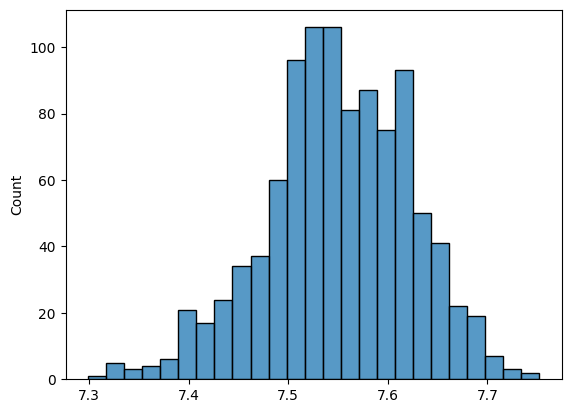

In [97]:
mean_flavors_1000 = [
    np.mean(coffee_sample.sample(frac=1, replace=True)["flavor"]) for _ in range(1000)
]
sns.histplot(mean_flavors_1000)
plt.show()

In [98]:
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [99]:
spotify_sample = spotify_population[["artists", "name", "danceability"]].reset_index()
print(spotify_sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41656 entries, 0 to 41655
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         41656 non-null  int64  
 1   artists       41656 non-null  object 
 2   name          41656 non-null  object 
 3   danceability  41656 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB
None


### Generating a bootstrap distribution
The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

In [100]:
# Generate a single bootstrap resample from spotify_sample.
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Calculate the mean of the danceability column of spotify_1_resample using numpy.
mean_danceability_1 = spotify_1_resample["danceability"].mean()

print(mean_danceability_1)

0.5897406159976954


In [101]:
# Replicate the expression provided 1000 times.
mean_danceability_1000 = [
    np.mean(spotify_sample.sample(frac=1, replace=True)["danceability"])
    for _ in range(1000)
]
# Print the result
print(mean_danceability_1000)

[np.float64(0.5910307566737085), np.float64(0.591112478394469), np.float64(0.5904878937007875), np.float64(0.5934522925869022), np.float64(0.5917143244670636), np.float64(0.5905781520069138), np.float64(0.5906983531784136), np.float64(0.5910115973689264), np.float64(0.5913295203572114), np.float64(0.5915139379681198), np.float64(0.5925490709621664), np.float64(0.5904217063568274), np.float64(0.5900167370846937), np.float64(0.5910134770501247), np.float64(0.5908218792010754), np.float64(0.591421171019781), np.float64(0.5915365949683119), np.float64(0.590665884866526), np.float64(0.590104376320338), np.float64(0.5918276454772422), np.float64(0.5922024222200883), np.float64(0.59233546667947), np.float64(0.5890792466871518), np.float64(0.5899285313040137), np.float64(0.5910135322642596), np.float64(0.5913961374111772), np.float64(0.5916492726137892), np.float64(0.5918331740925676), np.float64(0.5910543475129633), np.float64(0.5927119886690994), np.float64(0.593209864125216), np.float64(0.5

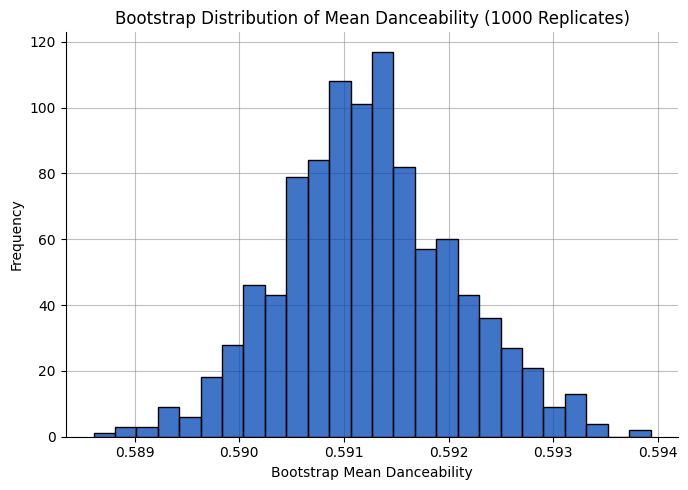

In [102]:
# Create a bootstrap distribution by drawing a histogram of mean_danceability_1000.
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(mean_danceability_1000, color="#0045b4", ax=ax)
sns.despine()

ax.set(
    xlabel="Bootstrap Mean Danceability",
    ylabel="Frequency",
    title="Bootstrap Distribution of Mean Danceability (1000 Replicates)",
)
ax.grid(True, alpha=0.5, linewidth=0.8, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## Recap: Two Types of Distributions

To compare these concepts, it is essential to be precise about their definitions:

  * **Sampling Distribution**: This is the *theoretical* distribution of a statistic (e.g., the mean) that would be formed by calculating that statistic on *every possible sample* of a given size $n$ drawn from a population. Its mean is the true population mean ($\mu$), and its standard deviation is the **true standard error**. We can only create this distribution if we have access to the entire population.

  * **Bootstrap Distribution**: This is a *practical, simulated* distribution of a statistic. It is generated by repeatedly resampling *with replacement* from a single original sample and calculating the statistic on each resample. We use it to infer the properties of the unknown sampling distribution.

### Comparing the Centers of the Distributions

The most important distinction lies in what each distribution is centered on.

  * The mean of the **sampling distribution** is, by definition, the **true population mean**.
  * The mean of the **bootstrap distribution** will be centered on the **original sample's mean**.

This leads to a critical implication: **bootstrapping cannot correct for a biased sample.** If your original sample was collected in a way that makes it unrepresentative of the population, its mean will be a poor estimate of the population mean. The bootstrap distribution will be faithfully centered around this poor estimate, not the true population parameter.

```python
import pandas as pd
import numpy as np

# Create a "population"
population = pd.DataFrame({'value': np.random.normal(loc=100, scale=10, size=5000)})
pop_mean = population['value'].mean()

# Take one "original sample"
original_sample = population.sample(n=150, random_state=42)
sample_mean = original_sample['value'].mean()

# Generate a bootstrap distribution from the original sample
bootstrap_means = []
for i in range(1000):
    bootstrap_sample = original_sample.sample(frac=1, replace=True, random_state=i)
    bootstrap_means.append(bootstrap_sample['value'].mean())
bootstrap_mean = np.mean(bootstrap_means)

print(f"True Population Mean: {pop_mean:.4f}")
print(f"Original Sample Mean: {sample_mean:.4f}")
print(f"Mean of Bootstrap Distribution: {bootstrap_mean:.4f}")
```

As shown, the mean of the bootstrap distribution is a near-perfect estimate of the original sample's mean, not necessarily the true population mean.


### Comparing the Spreads of the Distributions

The relationship between the standard deviations of these distributions is the key to why bootstrapping is so useful. Let's define the different "spreads":

1.  **Population Standard Deviation ($\\sigma$)**: Measures the variability of individual data points in the full population.
3.  **Standard Error ($SE$)**: The true standard deviation of the sampling distribution. It measures the sample-to-sample variability of the sample mean. Its formula is $SE = \sigma / \sqrt{n}$.
4.  **Bootstrap Standard Error**: The standard deviation of the **bootstrap distribution**. This is our best estimate of the true, unknown standard error.

The bootstrap distribution allows us to estimate the standard error directly from our single sample.

```python
# Continuing the previous example 

# 1. Population Standard Deviation (True Value)
pop_std = population['value'].std(ddof=0)

# 2. Original Sample Standard Deviation
sample_std = original_sample['value'].std(ddof=1) # ddof=1 for a sample

# 3. True Standard Error (Calculated from Population)
n = len(original_sample)
true_standard_error = pop_std / np.sqrt(n)

# 4. Bootstrap Estimated Standard Error (Calculated from Simulation)
bootstrap_standard_error = np.std(bootstrap_means, ddof=1)

print(f"\nTrue Standard Error (from Population): {true_standard_error:.4f}")
print(f"Bootstrap Estimated Standard Error: {bootstrap_standard_error:.4f}")
```

The bootstrap estimate is a very good approximation of the true standard error, achieved using only the information available in the original sample.

#### The Relationship Between Standard Error and Population Standard Deviation

From the standard error formula, we can see a direct relationship between the population's standard deviation and the standard error:

$$\sigma = SE \times \sqrt{n}$$

We can use our bootstrap estimate of the standard error to work backwards and estimate the population's standard deviation.

```python
# Estimate the population standard deviation using the bootstrap standard error
estimated_pop_std = bootstrap_standard_error * np.sqrt(n)

print(f"\nTrue Population Std Dev (σ): {pop_std:.4f}")
print(f"Original Sample Std Dev (s): {sample_std:.4f}")
print(f"Population Std Dev (estimated from bootstrap): {estimated_pop_std:.4f}")
```

This confirms the entire theoretical framework: the bootstrap distribution's standard deviation provides a reliable estimate of the standard error, which in turn relates directly back to the standard deviation of the original population.

In [103]:
# 500 randomly sampled rows from spotify_population
# Set seed once for reproducibility
np.random.seed(42)
spotify_sample = spotify_population.sample(n=500)

In [104]:
# Generate a sampling distribution of 2000 replicates
# Set seed once for reproducibility
np.random.seed(42)
mean_popularity_2000_samp = [
    spotify_population.sample(n=500, replace=False)["popularity"].mean()
    # Generate a bootstrap distribution of 2000 replicates
    for _ in range(2000)
]
# Print the sampling distribution results
print(mean_popularity_2000_samp)

[np.float64(54.762), np.float64(54.078), np.float64(55.588), np.float64(54.762), np.float64(55.254), np.float64(55.604), np.float64(55.828), np.float64(55.728), np.float64(55.444), np.float64(54.266), np.float64(54.784), np.float64(55.846), np.float64(53.78), np.float64(53.35), np.float64(54.834), np.float64(54.544), np.float64(54.466), np.float64(54.884), np.float64(54.942), np.float64(54.256), np.float64(55.118), np.float64(53.716), np.float64(55.04), np.float64(54.932), np.float64(54.126), np.float64(54.742), np.float64(54.926), np.float64(55.14), np.float64(53.968), np.float64(54.948), np.float64(54.98), np.float64(55.526), np.float64(55.238), np.float64(55.294), np.float64(55.4), np.float64(54.458), np.float64(55.58), np.float64(54.888), np.float64(54.736), np.float64(54.988), np.float64(54.524), np.float64(54.704), np.float64(55.186), np.float64(55.08), np.float64(54.38), np.float64(54.668), np.float64(55.272), np.float64(53.774), np.float64(55.3), np.float64(55.564), np.float64(

In [105]:
# Sample 500 rows of the sample with replacement and calculate the mean popularity to generate a bootstrap distribution of 2000 replicates.
# Set seed once for reproducibility
np.random.seed(42)
mean_popularity_2000_boot = [
    spotify_sample.sample(n=500, replace=True)["popularity"].mean()
    # Generate a bootstrap distribution of 2000 replicates
    for _ in range(2000)
]

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[np.float64(55.264), np.float64(55.328), np.float64(54.592), np.float64(54.766), np.float64(54.942), np.float64(54.218), np.float64(55.424), np.float64(54.62), np.float64(55.316), np.float64(54.842), np.float64(55.166), np.float64(54.968), np.float64(55.4), np.float64(54.682), np.float64(54.94), np.float64(54.544), np.float64(54.774), np.float64(54.46), np.float64(54.562), np.float64(54.504), np.float64(55.052), np.float64(54.508), np.float64(55.538), np.float64(54.586), np.float64(54.788), np.float64(55.146), np.float64(55.068), np.float64(54.876), np.float64(53.3), np.float64(54.862), np.float64(54.584), np.float64(54.668), np.float64(54.132), np.float64(54.306), np.float64(54.55), np.float64(55.524), np.float64(55.456), np.float64(55.078), np.float64(54.93), np.float64(55.124), np.float64(54.242), np.float64(55.03), np.float64(54.138), np.float64(55.314), np.float64(54.456), np.float64(54.544), np.float64(54.582), np.float64(54.098), np.float64(54.808), np.float64(55.29), np.float64

In [106]:
# Set seed once for reproducibility
np.random.seed(42)
sampling_distribution = [
    spotify_population.sample(n=5000, replace=False)["popularity"].mean()
    for _ in range(2000)
]

In [107]:
# Set seed once for reproducibility
np.random.seed(42)

bootstrap_distribution = [
    spotify_sample.sample(n=5000, replace=True)["popularity"].mean()
    for _ in range(2000)
]

### Compare sampling and bootstrap means
To make calculation easier, distributions similar to those calculated from the previous exercise have been included, this time using a sample size of 5000.

In [108]:
# Calculate the population mean popularity
pop_mean = spotify_population["popularity"].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample["popularity"].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print(f"Population mean: {pop_mean:.4f}")
print(f"Original sample mean: {samp_mean:.4f}")
print(f"Sampling distribution mean: {samp_distn_mean:.4f}")
print(f"Bootstrap distribution mean: {boot_distn_mean:.4f}")

Population mean: 54.8371
Original sample mean: 54.7620
Sampling distribution mean: 54.8401
Bootstrap distribution mean: 54.7676


In [109]:
n = 5000  # size of each resample

# Calculate the population std dev popularity
pop_sd = spotify_population["popularity"].std(ddof=0)

# Calculate the original sample std dev popularity (sample std dev, ddof=1)
samp_sd = spotify_sample["popularity"].std(ddof=1)

# Calculate the sampling distribution estimate of std dev popularity (standard error * sqrt(n))
samp_distn_sd = np.std(sampling_distribution, ddof=1) * np.sqrt(n)

# Calculate the bootstrap distribution estimate of std dev popularity (standard error * sqrt(n))
boot_distn_sd = np.std(bootstrap_distribution, ddof=1) * np.sqrt(n)

print(f"Population std dev popularity: {pop_sd:.4f}")
print(f"Original sample std dev popularity: {samp_sd:.4f}")
print(f"Sampling distribution estimate of std dev popularity: {samp_distn_sd:.4f}")
print(f"Bootstrap distribution estimate of std dev popularity: {boot_distn_sd:.4f}")

Population std dev popularity: 10.8801
Original sample std dev popularity: 11.0715
Sampling distribution estimate of std dev popularity: 10.4567
Bootstrap distribution estimate of std dev popularity: 11.1972


## The Limits of a Point Estimate

A point estimate, like a sample mean, is our single best guess for a population parameter. However, due to sampling variability, this estimate is almost certainly not the exact true value. A **confidence interval** is more informative because it communicates our uncertainty by providing a range of plausible values for the parameter.

For example, stating a weather prediction as "47°F" is less useful than stating it as "a 95% confidence interval of 40°F to 54°F." This can also be written as `47°F ± 7°F`, where `7°F` is the **margin of error**.

### Building Intervals from Bootstrap Distributions

The **bootstrap distribution** is the key to creating a confidence interval when we only have one sample. Since the bootstrap distribution approximates the true sampling distribution, its spread provides a direct measure of the uncertainty of our point estimate. From this distribution, we can calculate a confidence interval in two primary ways.

```python
import pandas as pd
import numpy as np

# Generate a Bootstrap Distribution (Prerequisite)
# Assume we have an original sample of 150 observations
np.random.seed(101)
original_sample = pd.DataFrame({
    'value': np.random.normal(loc=100, scale=10, size=150)
})

# Create 1000 bootstrap replicates of the mean
bootstrap_means = []
for i in range(1000):
    bootstrap_sample = original_sample.sample(frac=1, replace=True, random_state=i)
    bootstrap_means.append(bootstrap_sample['value'].mean())
```

### Method 1: The Percentile Method

This is the most direct and intuitive way to construct a bootstrap confidence interval. The logic is that if the bootstrap distribution represents the range of possible sample means, then the "middle" 95% of these values should constitute a plausible range for the true population mean.

  * **Why**: It is simple to compute and does not assume that the bootstrap distribution is perfectly normal, making it robust for skewed distributions.
  * **How**: To construct a 95% confidence interval, you find the 2.5th percentile (the value below which 2.5% of the data lies) and the 97.5th percentile (the value below which 97.5% of the data lies) of the bootstrap distribution.

<!-- end list -->

```python
# Calculate the lower and upper bounds of the 95% confidence interval
lower_bound_pct = np.quantile(bootstrap_means, 0.025)
upper_bound_pct = np.quantile(bootstrap_means, 0.975)

print(f"Lower Bound: {lower_bound_pct:.4f}")
print(f"Upper Bound: {upper_bound_pct:.4f}")
```

### Method 2: The Standard Error Method (Normal Approximation)

This method leverages the Central Limit Theorem, which states that sampling distributions are often approximately normal. It constructs the confidence interval using a well-known formula:

$$\text{Confidence Interval} = \text{Point Estimate} \pm z^* \times \text{Standard Error}$$

**Components:**

1.  **Point Estimate**: The mean of the bootstrap distribution (which is our best estimate of the sample mean).
2.  **Standard Error**: The standard deviation of the bootstrap distribution.
3.  **$z^*$ (Critical Value)**: A multiplier from the standard normal distribution that determines the confidence level. For a 95% confidence interval, this value is approximately.

We use the `scipy.stats.norm.ppf()` function to find the appropriate z-values. `ppf` stands for "Percent Point Function" and is the inverse of the Cumulative Distribution Function (CDF).

  * **Why**: This is a more traditional, formula-based approach that directly uses the standard error.
  * **How**: Calculate the mean and standard deviation of the bootstrap distribution, then use `norm.ppf()` to find the bounds.

```python
from scipy.stats import norm

# 1. Calculate the point estimate and standard error from the bootstrap distribution
point_estimate = np.mean(bootstrap_means)
standard_error = np.std(bootstrap_means, ddof=1) # Use ddof=1 for a sample

# 2. Calculate the lower and upper bounds using the normal distribution's ppf
# For a 95% CI, we use the 2.5% and 97.5% quantiles.
lower_bound_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)
upper_bound_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

print(f"Lower Bound: {lower_bound_se:.4f}")
print(f"Upper Bound: {upper_bound_se:.4f}")
```

If the bootstrap distribution is symmetric and bell-shaped, the percentile and standard error methods will produce very similar confidence intervals. If the distribution is skewed, the percentile method is generally preferred as it does not rely on the assumption of normality.

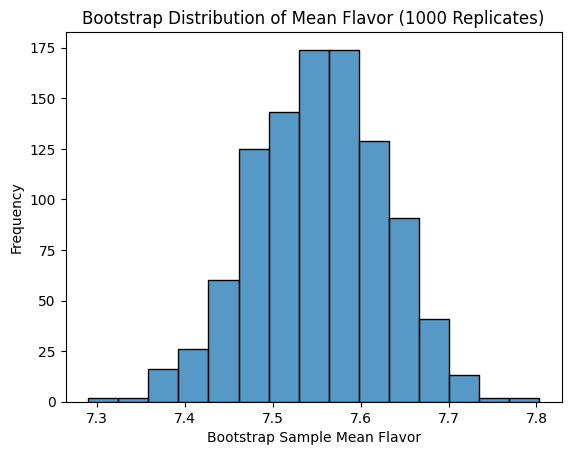

In [110]:
mean_flavors_1000 = [
    np.mean(coffee_sample.sample(frac=1, replace=True)["flavor"]) for _ in range(1000)
]
sns.histplot(mean_flavors_1000, bins=15)
plt.title("Bootstrap Distribution of Mean Flavor (1000 Replicates)")
plt.xlabel("Bootstrap Sample Mean Flavor")
plt.ylabel("Frequency")
plt.show()

In [111]:
# Mean of the resamples
np.mean(mean_flavors_1000)

np.float64(7.552077000000001)

Mean plus or minus one standard deviation

In [112]:
minus = np.mean(mean_flavors_1000) - np.std(mean_flavors_1000, ddof=1)
plus = np.mean(mean_flavors_1000) + np.std(mean_flavors_1000, ddof=1)

print(f"Mean minus one std: {minus}")
print(f"Mean plus one std: {plus}")

Mean minus one std: 7.478809181387432
Mean plus one std: 7.625344818612569


### First Method of calculating Confidence Intervals -> Quantiles

In [113]:
lower_bound = np.quantile(mean_flavors_1000, 0.025)
upper_bound = np.quantile(mean_flavors_1000, 0.975)

print(f"Lower bound quantile: {lower_bound}")
print(f"Upper bound quantile: {upper_bound}")

Lower bound quantile: 7.407000000000001
Upper bound quantile: 7.685


### Second Method for calculating Confidence Intervals -> Inverse cumulative distribution function

In [124]:
from scipy.stats import norm

# Convert the list of bootstrap means to a NumPy array
bootstrap_values = np.asarray(mean_flavors_1000)

# Calculate the point estimate: the mean of the bootstrap distribution (best estimate of the sample mean)
point_estimate = bootstrap_values.mean()

# Calculate the bootstrap standard error: the standard deviation of the bootstrap means (ddof=1 for sample SD)
standard_error = bootstrap_values.std(ddof=1)

# Confidence Interval Methods

# 1) Percentile (quantile) method: the 2.5th and 97.5th percentiles give the 95% confidence interval
lower_percentile, upper_percentile = np.quantile(bootstrap_values, [0.025, 0.975])

# 2) Normal approximation method: assumes the bootstrap distribution is approximately normal

# 2a) Use the standard normal critical value (z ≈ 1.96 for 95% CI) to calculate the interval as mean ± z * SE
z_critical = norm.ppf(0.975)  # 97.5th percentile of the standard normal distribution
ci_lower_se_formula = point_estimate - z_critical * standard_error
ci_upper_se_formula = point_estimate + z_critical * standard_error

In [125]:
# 2b) Normal approximation CI: use the inverse CDF (ppf) of the normal distribution
#    with the bootstrap mean as the center (loc) and the bootstrap SE as the spread (scale)
ci_lower_se_ppf, ci_upper_se_ppf = norm.ppf(
    [0.025, 0.975], loc=point_estimate, scale=standard_error
)

# Print a compact comparison of all CI methods and the point estimate
print(f"Point estimate (bootstrap mean): {point_estimate:.5f}")
print(f"Bootstrap standard error (SD of bootstrap means): {standard_error:.5f}\n")

print("95% CI by empirical percentiles (np.quantile):")
print(f"  [{lower_percentile:.5f}, {upper_percentile:.5f}]")

print("\n95% CI by normal approximation (mean ± z*SE):")
print(f"  [{ci_lower_se_formula:.5f}, {ci_upper_se_formula:.5f}]")

print("\n95% CI by normal approximation using norm.ppf with loc/scale:")
print(f"  [{ci_lower_se_ppf:.5f}, {ci_upper_se_ppf:.5f}]")

Point estimate (bootstrap mean): 7.55208
Bootstrap standard error (SD of bootstrap means): 0.07327

95% CI by empirical percentiles (np.quantile):
  [7.40700, 7.68500]

95% CI by normal approximation (mean ± z*SE):
  [7.40847, 7.69568]

95% CI by normal approximation using norm.ppf with loc/scale:
  [7.40847, 7.69568]


In [129]:
# Generate a 95% confidence interval using the quantile method on the bootstrap distribution, setting the 0.025 quantile as lower_quant and the 0.975 quantile as upper_quant.
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
# Print standard error method confidence interval
print(f"Lower bound quantile: {lower_quant:.4f}")
print(f"Upper bound quantile: {upper_quant:.4f}")

Lower bound quantile: 54.4618
Upper bound quantile: 55.0763


In [128]:
from scipy.stats import norm

# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution, ddof=1)

# Calculate lower_se as the 0.025 quantile of an inv. CDF from a normal distribution with mean point_estimate and standard deviation standard_error.
lower_se, upper_se = norm.ppf([0.025, 0.975], loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print(f"Lower bound quantile: {lower_se:.4f}")
print(f"Upper bound quantile: {upper_se:.4f}")

Lower bound quantile: 54.4573
Upper bound quantile: 55.0780
